In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from scipy.integrate import trapezoid as trapz
import glob, os, re
import herald_visualization.echem as ec
from herald_visualization.mpr2csv import cycle_mpr2csv, id_to_path
from herald_visualization.plot import *

In [2]:
default_params = {
              'font.family': 'Helvetica',
              'axes.labelsize': 20,
              'axes.labelweight': 'bold',  # Make axes labels bold
              'xtick.labelsize': 18,
              'ytick.labelsize': 18,
              'xtick.major.size': 7,
              'ytick.major.size': 7,
              'xtick.major.width': 2.0,
              'ytick.major.width': 2.0,
              'xtick.direction': 'in',
              'ytick.direction': 'in',
              'font.size': 24,
              'axes.linewidth': 2.0,
              'lines.dashed_pattern': (5, 2.5),
              'lines.markersize': 10,
              'lines.linewidth': 3,
              'lines.markeredgewidth': 1,
              'lines.markeredgecolor': 'k',
              'legend.fontsize': 16,  # Adjust the font size of the legend
              'legend.title_fontsize': 24,  # Increase legend title size if needed
              'legend.frameon': True
    }
plt.rcParams.update(default_params)

In [3]:
os.getcwd()
# os.chdir('/Users/eschl/MIT Dropbox/Christopher Eschler/MIT/_Grad/Thesis/Data/herald_visualization/notebooks')

'/Users/eschl/MIT Dropbox/Christopher Eschler/MIT/_Grad/Thesis/Data/herald_visualization/notebooks'

In [11]:
cells_df = pd.read_csv('../../PROPEL-1K/In-house cells and syntheses - Coin Cells.csv', index_col='Identifier')

In [12]:
ccpp_ids = cells_df[cells_df['Separator'] == 'Ceramic-coated PP x2'].index.tolist()
cycling_mask = cells_df['Test Type'] == 'Cycling'
ignore_ids = ['053D','054C','054D','055B','063B','066A','066B','067A','067B'] # Ignore cell IDs that are known to cause glitches
bad_ids = ['052A','053A','053I','054A','056C','056D','060A','060D','061A','061C'] # Ignore cell IDs that had issues during testing

In [4]:
cycle_mpr2csv(id_to_path('053H'))

Running in /Users/eschl/MIT Dropbox/Christopher Eschler/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-Fe0p75Mn0p25F3-25CB-C1-CCPP/250203-CC053H-C20-2V-4p4V_CV
Data file(s): ['250203-CC053H-C20-2V-4p4V_CV_02_GCPL_C14.mpr']
Settings file: 250203-CC053H-C20-2V-4p4V_CV.mps
Cell properties: {'active_material_mass': 3.7, 'x_at_mass': 0.0, 'empty_mol_weight': 112.61, 'interc_weight': 6.941, 'x_at_start': 0.0, 'e_per_ion': 3.0, 'surface_area': 2.0}
CSV exported to: outputs/250203-CC053H-C20-2V-4p4V_CV.csv
Cycle summary CSV exported to: outputs/cycle_summary.csv


flags  Ns        time/s   dQ/mA.h  (Q-Qo)/mA.h  control/V/mA  \
0           19   0  5.912294e+02  0.000000     0.000000      0.000000   
1           19   0  5.922294e+02  0.000000     0.000000      0.000000   
2           19   0  5.932294e+02  0.000000     0.000000      0.000000   
3           19   0  5.942294e+02  0.000000     0.000000      0.000000   
4           19   0  5.952294e+02  0.000000     0.000000      0.000000   
...        ...  ..           ...       ...          ...           ...   
1630200     22   2  1.630595e+06  0.000004     3.133328      4.400003   
1630201     22   2  1.630596e+06  0.000004     3.133332      4.400003   
1630202     22   2  1.630597e+06  0.000004     3.133336      4.400003   
1630203     22   2  1.630598e+06  0.000004     3.133340      4.400003   
1630204     22   2  1.630599e+06  0.000004     3.133345      4.400003   

          Voltage  I Range  Q charge/discharge/mA.h  half cycle  ...  \
0        2.138772       14                 0.000000           0  ...   
1        2.136309       14                 0.000000           0  ...   
2        2.136099       14                 0.000000           0  ...   
3        2.136003       14                 0.000000           0  ...   
4        2.135870       14                 0.000000           0  ...   
...           ...      ...                      ...         ...  ...   
1630200  4.397695       12                 0.435371          42  ...   
1630201  4.397676       12                 0.435375          42  ...   
1630202  4.397734       12                 0.435379          42  ...   
1630203  4.397619       12                 0.435383          42  ...   
1630204  4.397657       12                 0.435387          42  ...   

            Power  Specific Capacity  Specific Current  Specific Power  \
0        0.000000           0.000000          0.000000        0.000000   
1        0.000000           0.000000          0.000000        0.000000   
2        0.000000           0.000000          0.000000        0.000000   
3        0.000000           0.000000          0.000000        0.000000   
4        0.000000           0.000000          0.000000        0.000000   
...           ...                ...               ...             ...   
1630200  0.065043         117.667732          3.997364       17.579187   
1630201  0.065052         117.668842          3.997964       17.581750   
1630202  0.065061         117.669953          3.998458       17.584153   
1630203  0.064999         117.671063          3.994759       17.567428   
1630204  0.065043         117.672173          3.997408       17.579228   

         Specific Capacity Total AM  Specific Current Total AM  \
0                          0.000000                   0.000000   
1                          0.000000                   0.000000   
2                          0.000000                   0.000000   
3                          0.000000                   0.000000   
4                          0.000000                   0.000000   
...                             ...                        ...   
1630200                   99.304994                   3.373552   
1630201                   99.305931                   3.374058   
1630202                   99.306869                   3.374475   
1630203                   99.307805                   3.371354   
1630204                   99.308742                   3.373589   

         Specific Power Total AM  Areal Capacity  Areal Current  Areal Power  
0                       0.000000        0.000000       0.000000     0.000000  
1                       0.000000        0.000000       0.000000     0.000000  
2                       0.000000        0.000000       0.000000     0.000000  
3                       0.000000        0.000000       0.000000     0.000000  
4                       0.000000        0.000000       0.000000     0.000000  
...                          ...             ...            ...          ...  
1630200                14.835852

In [13]:
process_all_files = True
for id in ccpp_ids:
    if id not in ignore_ids and id not in bad_ids:
        processed_time = os.path.getmtime(os.path.join(id_to_path(id), 'outputs', 'cycle_summary.csv'))
        latest_data_time = max([os.path.getmtime(file) for file in glob.glob(os.path.join(id_to_path(id),'*.mpr'))])
        if latest_data_time > processed_time or process_all_files:
            cycle_mpr2csv(id_to_path(id))

Running in /Users/eschl/MIT Dropbox/Christopher Eschler/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-Fe0p81Co0p19F3-25CB-C1-CCPP/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h
Data file(s): ['241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h_02_GCPL_C04.mpr']
Settings file: 241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h.mps
Cell properties: {'active_material_mass': 2.82, 'x_at_mass': 0.0, 'empty_mol_weight': 113.42, 'interc_weight': 6.94, 'x_at_start': 0.0, 'e_per_ion': 3.0, 'surface_area': 2.0}
CSV exported to: outputs/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h.csv
Cycle summary CSV exported to: outputs/cycle_summary.csv
Running in /Users/eschl/MIT Dropbox/Christopher Eschler/MIT/_Grad/Thesis/Data/PROPEL-1K/Li-Fe0p81Co0p19F3-25CB-C1-CCPP/241127-CC052C-C50-1p5V-4p4V_CV-GITT_10SoC_6h
Data file(s): ['241127-CC052C-C50-1p5V-4p4V_CV-GITT_10SoC_6h_02_GCPL_C07.mpr', '241127-CC052C-C50-1p5V-4p4V_CV-GITT_10SoC_6h_04_GCPL_C07.mpr']
Settings file: 241127-CC052C-C50-1p5V-4p4V_CV-GITT_10SoC_6h.mps
Cell properties: {'activ

In [15]:
def summarize_cycling_fom(cell_df, id):
    try:
        df, df_sum = parse_cycle_csv(os.path.join(id_to_path(id),'outputs'))
    except (IndexError, FileNotFoundError) as error:
        cycle_mpr2csv(id_to_path(id))
        df, df_sum = parse_cycle_csv(os.path.join(id_to_path(id),'outputs'))

    final_cycle = df['full cycle'].iloc[-1]
    resting_at_end = 1 if df['state'].iloc[-1] == 'R' else 0 # Rest as final data point suggests completion of the final cycle
    # This helps to prevent analysis of half finished cycles

    cha_mask = df['state'] == 1
    dis_mask = df['state'] == -1
    rest_mask = df['state'] == 0

    # If cycle summary hasn't been exported, df_sum will return None
    if not isinstance(df_sum, pd.DataFrame):
        print(f"No summary file found, skipping CC{id}")
        return cell_df

    # Summary can only be calculated if at least the 0th cycle is complete
    # This is true if final_cycle is 0 and the test ends in a rest
    # or if final_cycle is > 0
    # Cycle 0 must also exist in df_sum, which won't be the case for tests starting with charge
    if (final_cycle + resting_at_end) > 0 and 0 in df_sum.index:
        cell_df.loc[id, 'LCV'] = df_sum['LCV'].iloc[0]
        cell_df.loc[id, 'UCV'] = df_sum['UCV'].iloc[0]
        cell_df.loc[id, 'Specific discharge energy 0'] = df_sum.loc[0, 'Specific Discharge Energy Total AM']
        cell_df.loc[id, 'Max specific discharge energy'] = df_sum['Specific Discharge Energy Total AM'].max()
        cell_df.loc[id, 'Specific discharge capacity 0'] = df_sum.loc[0, 'Specific Discharge Capacity Total AM']
        cell_df.loc[id, 'Max specific discharge capacity'] = df_sum['Specific Discharge Capacity Total AM'].max()
        cell_df.loc[id, 'Discharge overpotential 0'] = df[(df['half cycle'] == 1) & rest_mask]['Voltage'].max() - df[(df['half cycle'] == 1) & dis_mask]['Voltage'].min()

    if (final_cycle + resting_at_end) > 1:
        cell_df.loc[id, 'Specific discharge energy 1'] = df_sum.loc[1, 'Specific Discharge Energy Total AM']
        cell_df.loc[id, 'Discharge energy retention 0,1'] = df_sum.loc[1, 'Specific Discharge Energy Total AM']/df_sum.loc[0, 'Specific Discharge Energy Total AM']
        cell_df.loc[id, 'Specific discharge capacity 1'] = df_sum.loc[1, 'Specific Discharge Capacity Total AM']
        cell_df.loc[id, 'Discharge capacity retention 0,1'] = df_sum.loc[1, 'Specific Discharge Capacity Total AM']/df_sum.loc[0, 'Specific Discharge Capacity Total AM']
        cell_df.loc[id, 'Charge overpotential 1'] = df[(df['half cycle'] == 2) & cha_mask]['Voltage'].max() - df[(df['half cycle'] == 2) & rest_mask]['Voltage'].min()
    
    if (final_cycle + resting_at_end) > 5:
        cell_df.loc[id, 'Average discharge energy retention 0,5'] = (df_sum.loc[5, 'Specific Discharge Energy Total AM']/df_sum.loc[0, 'Specific Discharge Energy Total AM'])**0.2
        cell_df.loc[id, 'Average discharge capacity retention 0,5'] = (df_sum.loc[5, 'Specific Discharge Capacity Total AM']/df_sum.loc[0, 'Specific Discharge Capacity Total AM'])**0.2

    return cell_df

In [14]:
processed_ids = []

In [16]:
# Summary figures of merit for cells that have performed 'Cycling' tests
for id in cells_df[cycling_mask].index:
    if id not in processed_ids and id not in ignore_ids and id not in bad_ids:
        print(f"Summarizing CC{id}")
        cells_df = summarize_cycling_fom(cells_df, id)
        processed_ids.append(id)
    else:
        print(f"Ignoring CC{id}")

Ignoring CC052A
Summarizing CC052E
Summarizing CC052F
Ignoring CC053A
Summarizing CC053E
Summarizing CC053G
Summarizing CC053H
Ignoring CC053I
Ignoring CC054A
Summarizing CC054B
Summarizing CC055A
Summarizing CC055C
Ignoring CC056C
Ignoring CC056D
Summarizing CC056E
Summarizing CC056F
Summarizing CC057C
Summarizing CC057D
Summarizing CC057E
Summarizing CC058A
Summarizing CC058B
Summarizing CC058C
Summarizing CC059A
Summarizing CC059B
Summarizing CC059C
Ignoring CC060A
Summarizing CC060C
Ignoring CC060D
Ignoring CC061A
Ignoring CC061C
Summarizing CC061D
Summarizing CC062A
Summarizing CC062B
Summarizing CC063A
Summarizing CC064A
Summarizing CC064B
Summarizing CC065A
Summarizing CC065B
Ignoring CC066A
Ignoring CC066B
Ignoring CC067A
Ignoring CC067B
Summarizing CC068A
Summarizing CC068D
Summarizing CC069B
Summarizing CC069D


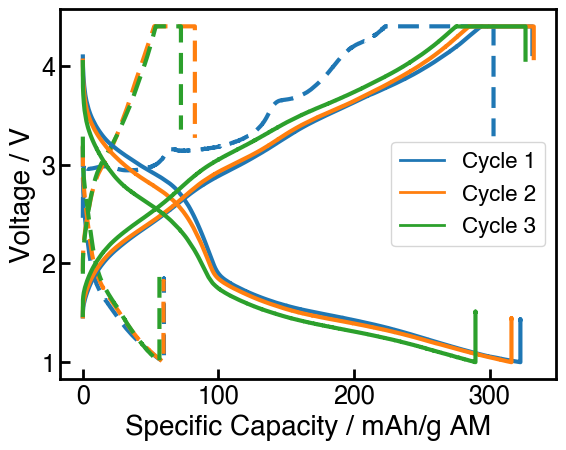

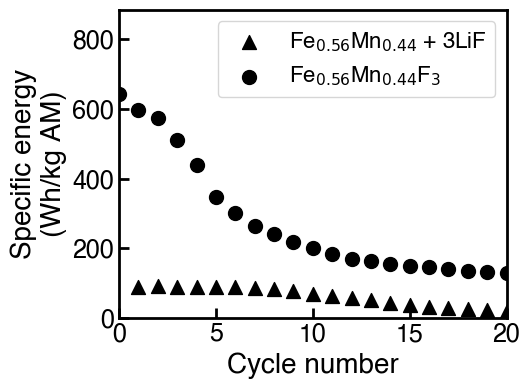

In [ ]:
# Overlay multiple cycling curves

cell_ids = ['058B','055A']
data_files = []
dfs = {}
df_sums = {}
cm = plt.get_cmap('tab20')

fig1, ax1 = plt.subplots()
cycles = [1,2,3]
for i, id in enumerate(cell_ids):
    df, df_sum = parse_cycle_csv(os.path.join(id_to_path(id), 'outputs'))
    dfs[id] = df
    df_sums[id] = df_sum
    if i == 1:
        ec.charge_discharge_plot(df, cycles, norm='full_mass', fig=fig1, ax=ax1)
    else:
        ec.charge_discharge_plot(df, cycles, norm='full_mass', fig=fig1, ax=ax1, plot_kwargs={'linestyle': '--'})
    # plt.gca().get_lines()[2*i].set_alpha(0) # Make charge curves transparent
    # plt.gca().get_lines()[2*i+1].set_color(cm(i))
# ax1.get_legend().remove()
# plt.ylim(1,4.2)
plt.show()

# for id in cell_ids:
#     csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
#     data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
#     data_files.append(data_file)
# cycle = 1 # Cycle to plot
# fig, ax = plot_multi_cell(data_files, cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist(),
#                 norm='full_mass') # Use fill_value to adjust cycle #
# plt.legend(cell_ids)
# plt.show()

fig2, ax2 = plt.subplots(figsize=(5,4))
labels = ['Fe$_{0.56}$Mn$_{0.44}$ + 3LiF','Fe$_{0.56}$Mn$_{0.44}$F$_3$']
for i, id in enumerate(cell_ids):
    df_sum = pd.read_csv(os.path.join(id_to_path(id), 'outputs', 'cycle_summary.csv'))
    m = '^' if i % 2 == 0 else 'o'
    ax2.scatter(df_sum['full cycle'], df_sum['Specific Discharge Energy Total AM'], label=labels[i], color='k', marker=m)
# plt.axhline(601.5, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific energy\n(Wh/kg AM)')
plt.xlim(0,20)
# plt.xticks([0,2,4,6,8,10])
plt.ylim(bottom=0)
plt.legend()
plt.show()

/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


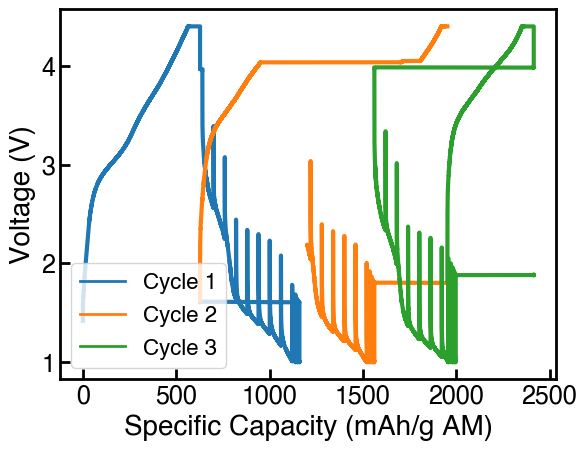

In [34]:
dfs['056A'], _ = parse_cycle_csv(os.path.join(id_to_path('056A'), 'outputs'))
fig1, ax1 = plot_cycling(dfs['056A'], cycles=[1,2,3], capacity_col='Specific Capacity Total AM', labels=['Cycle 1','Cycle 2','Cycle 3'])
# plot_cycling(dfs['058B'], cycles=[1,2,3], capacity_col='Specific Capacity Total AM', plot_kwargs={'linestyle': '--'}, fig=fig1, ax=ax1)

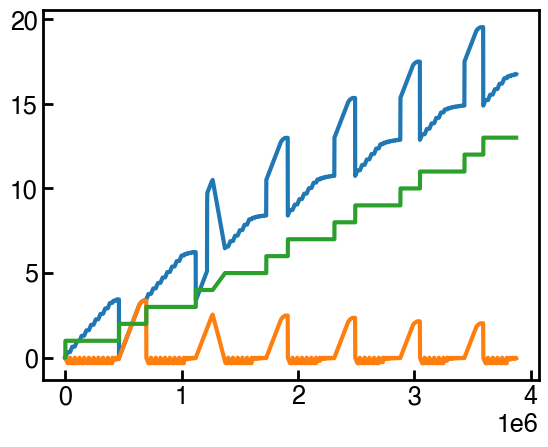

In [40]:
plt.plot(dfs['056A']['Time'], dfs['056A']['Capacity'])
plt.plot(dfs['056A']['Time'], dfs['056A']['(Q-Qo)/mA.h'])
plt.plot(dfs['056A']['Time'], dfs['056A']['half cycle'])

/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


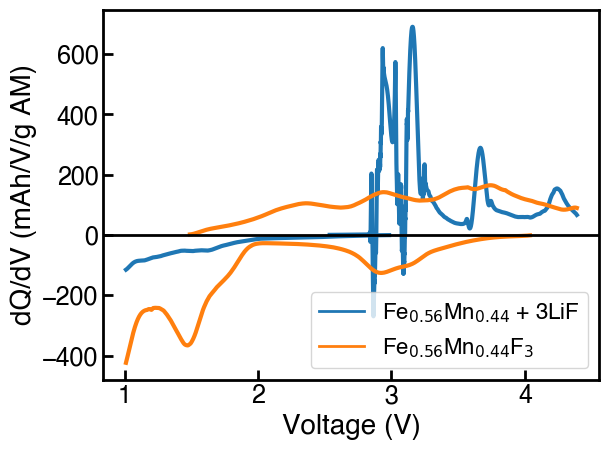

In [11]:
# Overlay multiple dQ/dV plots

cell_ids = ['058B','055A']
labels = ['Fe$_{0.56}$Mn$_{0.44}$ + 3LiF','Fe$_{0.56}$Mn$_{0.44}$F$_3$']
dfs = {}

for id in cell_ids:
    dir_name = os.path.join(id_to_path(id), 'outputs')
    df, df_sum = parse_cycle_csv(dir_name)
    dfs[id] = df

fig, ax = plot_dqdv(dfs, cycles=1, labels=labels)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Voltage / V', ylabel='dQ/dV / mAhV$^{-1}$'>)

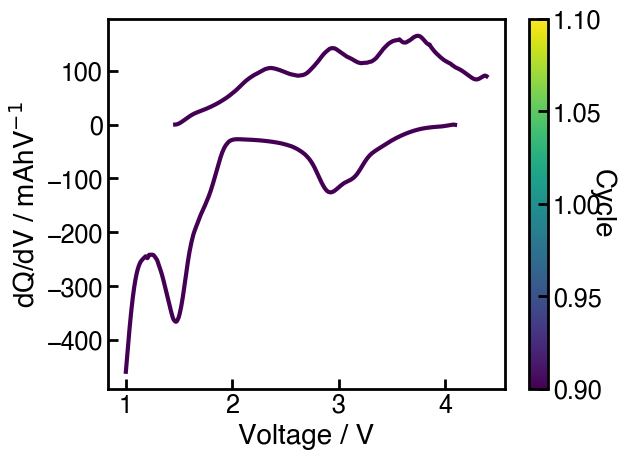

In [4]:
ec.multi_dqdv_plot(dfs_for_dqdv['055A'], cycles=[1], capacity_label='Specific Capacity Total AM')

/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


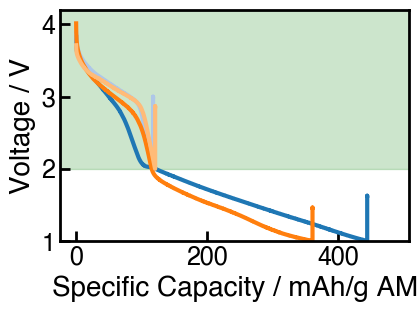

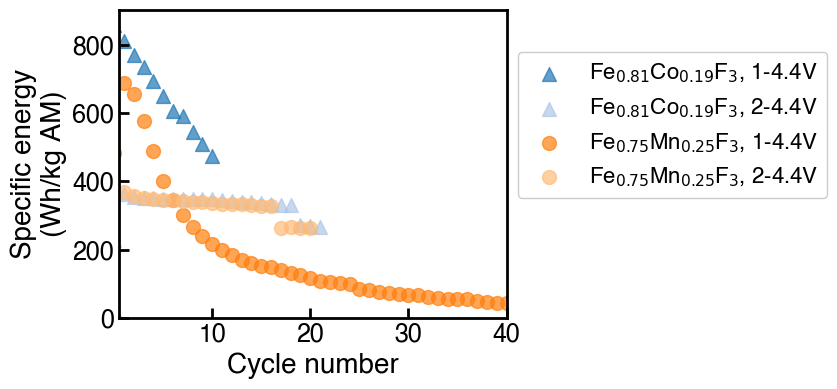

In [24]:
# Overlay multiple cycling curves

cell_ids = ['052E','052F','053G','053H']
data_files = []
dfs = {}
df_sums = {}
cm = plt.get_cmap('tab20')

fig1, ax1 = plt.subplots(figsize=(4.5,3))
cycles = [1]
# ax1.axhline(2, color='green', linestyle='--')
ax1.axhspan(2, 4.2, color='green', alpha=0.2)
for i, id in enumerate(cell_ids):
    # csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
    # data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    # data_files.append(data_file)
    df, df_sum = parse_cycle_csv(os.path.join(id_to_path(id), 'outputs'))
    dfs[id] = df
    df_sums[id] = df_sum
    ec.charge_discharge_plot(df, cycles, norm='full_mass', fig=fig1, ax=ax1)
    plt.gca().get_lines()[2*i].set_alpha(0) # Make charge curves transparent
    plt.gca().get_lines()[2*i+1].set_color(cm(i))
ax1.get_legend().remove()
plt.ylim(1,4.2)
plt.show()

# for i, df in enumerate(dfs):
#     ec.charge_discharge_plot(df)
# cycle = 1 # Cycle to plot
# fig, ax = plot_multi_cell(data_files, cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist(),
#                 norm='full_mass') # Use fill_value to adjust cycle #
# plt.gca().get_lines()[0].set_color(cm(0))
# plt.gca().get_lines()[1].set_color(cm(2))
# plt.legend(cell_ids)
# plt.show()

fig2, ax2 = plt.subplots(figsize=(5,4))
labels = ['Fe$_{0.81}$Co$_{0.19}$F$_3$, 1-4.4V', 'Fe$_{0.81}$Co$_{0.19}$F$_3$, 2-4.4V', 'Fe$_{0.75}$Mn$_{0.25}$F$_3$, 1-4.4V', 'Fe$_{0.75}$Mn$_{0.25}$F$_3$, 2-4.4V']
for i, id in enumerate(cell_ids):
    df_sum = pd.read_csv(os.path.join(id_to_path(id), 'outputs', 'cycle_summary.csv'))
    m = '^' if i < 2 else 'o'
    ax2.scatter(df_sum['full cycle'], df_sum['Specific Discharge Energy Total AM'], label=labels[i], color=cm(i), alpha=0.7, marker=m)
# plt.axhline(601.5, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific energy\n(Wh/kg AM)')
plt.xlim(0.5,40)
# plt.xticks([0,2,4,6,8,10])
plt.ylim(bottom=0)
plt.legend(loc='upper left', bbox_to_anchor=(1,0.9), framealpha=1)
plt.show()

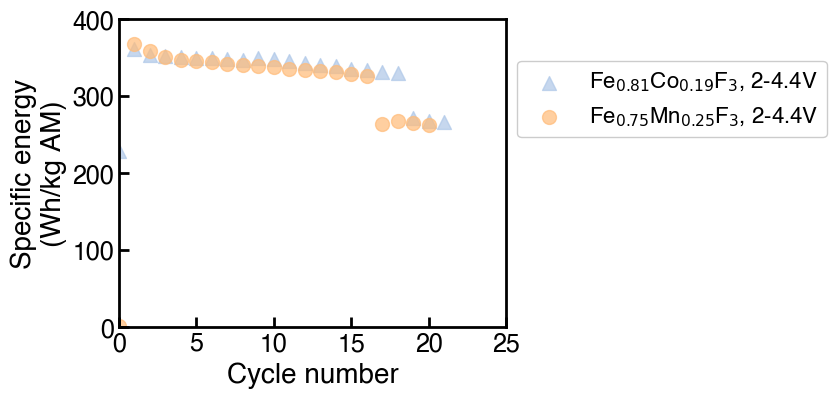

In [25]:
fig2, ax2 = plt.subplots(figsize=(5,4))
labels = ['Fe$_{0.81}$Co$_{0.19}$F$_3$, 1-4.4V', 'Fe$_{0.81}$Co$_{0.19}$F$_3$, 2-4.4V', 'Fe$_{0.75}$Mn$_{0.25}$F$_3$, 1-4.4V', 'Fe$_{0.75}$Mn$_{0.25}$F$_3$, 2-4.4V']
for i, id in enumerate(cell_ids):
    df_sum = pd.read_csv(os.path.join(id_to_path(id), 'outputs', 'cycle_summary.csv'))
    m = '^' if i < 2 else 'o'
    if i % 2 == 1:
        ax2.scatter(df_sum['full cycle'], df_sum['Specific Discharge Energy Total AM'], label=labels[i], color=cm(i), alpha=0.7, marker=m)
# plt.axhline(601.5, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific energy\n(Wh/kg AM)')
plt.xlim(0,25)
# plt.xticks([0,2,4,6,8,10])
plt.ylim(0,400)
plt.legend(loc='upper left', bbox_to_anchor=(1,0.9), framealpha=1)
plt.show()

In [33]:
df_sums['052F'].loc[1, 'Average Discharge Voltage']

np.float64(3.081662406463979)

In [14]:
print(
    retention_over_cycles(df_sums['052E'], data_col='Discharge Energy', start_cycle=1, end_cycle=10),
    retention_over_cycles(df_sums['052F'], data_col='Discharge Energy', start_cycle=19, end_cycle='last'),
    retention_over_cycles(df_sums['053G'], data_col='Discharge Energy', start_cycle=1, end_cycle=10),
    retention_over_cycles(df_sums['053H'], data_col='Discharge Energy', start_cycle=17, end_cycle='last')
)

0.9418410127551124 0.9892461957010996 0.8790924385884582 0.9981830612084099


Text(0.5, 1.0, 'Fe$_{0.75}$Mn$_{0.25}$F$_3$')

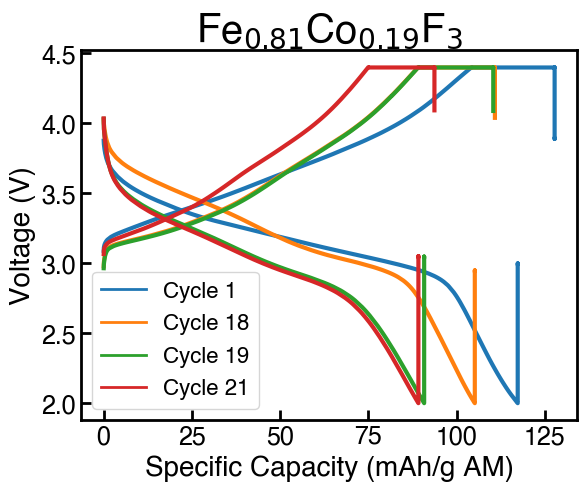

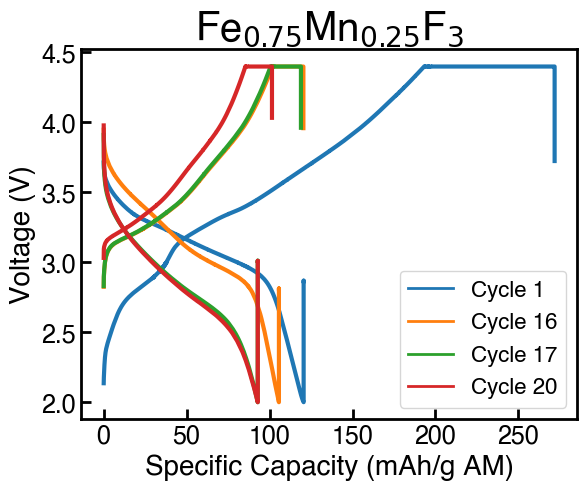

In [11]:
cyc = [1,18,19,21]
fig1, ax1 = plot_cycling(dfs['052F'], cycles=cyc, capacity_col='Specific Capacity Total AM')
ax1.set_title('Fe$_{0.81}$Co$_{0.19}$F$_3$')

cyc = [1,16,17,20]
fig2, ax2 = plot_cycling(dfs['053H'], cycles=cyc, capacity_col='Specific Capacity Total AM')
ax2.set_title('Fe$_{0.75}$Mn$_{0.25}$F$_3$')

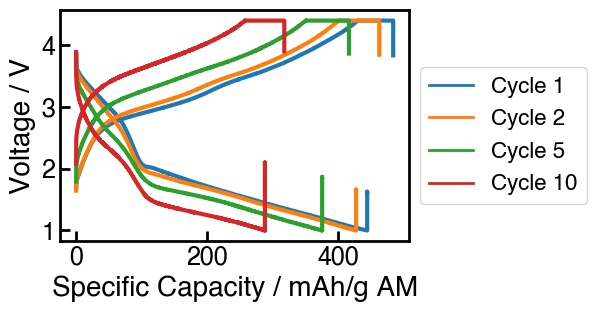

In [ ]:
dir_name = os.path.join(id_to_path('052E'), 'outputs')
df, df_sum = parse_cycle_csv(dir_name)

fig, ax = plt.subplots(figsize=(4.5,3))
ec.charge_discharge_plot(df, cycles=[1,2,5,10], norm='full_mass', fig=fig, ax=ax)
sn.move_legend(ax, 'upper left', bbox_to_anchor=(1.0,0.8))

In [15]:
df, df_sum = parse_cycle_csv(os.path.join(id_to_path('056A'),'outputs'))
df0 = df[df['full cycle'] == 0]
df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
ocv = df0[df0['state'] == 'R'].groupby('GITT step')['Voltage'].max()
capacity = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Specific Capacity Total AM'].last()
disch_voltage = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Voltage'].last()
FeF3_GITT = pd.DataFrame({
    'Specific Capacity Total AM': capacity,
    'OCV': ocv,
    'Discharge voltage': disch_voltage,
    'Overpotential': ocv - disch_voltage
})
FeF3_GITT['Specific Capacity Total AM'].fillna(0, inplace=True)

FeF3_gitt_energy = trapz(FeF3_GITT['OCV'], FeF3_GITT['Specific Capacity Total AM'])
df1 = df0.iloc[:-500] # Drop some of the final points because they cause spec cap to jump back to 0
FeF3_disch_energy = trapz(df1['Voltage'], df1['Specific Capacity Total AM'])
FeF3_avg_overpotential = (FeF3_gitt_energy - FeF3_disch_energy)/df0['Specific Capacity Total AM'].max()

/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/3724037905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/3724037905.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead

In [16]:
df, df_sum = parse_cycle_csv(os.path.join(id_to_path('053J'),'outputs'))
df0 = df[df['full cycle'] == 0]
df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
ocv = df0[df0['state'] == 'R'].groupby('GITT step')['Voltage'].max()
capacity = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Specific Capacity Total AM'].last()
disch_voltage = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Voltage'].last()
Mn25_GITT = pd.DataFrame({
    'Specific Capacity Total AM': capacity,
    'OCV': ocv,
    'Discharge voltage': disch_voltage,
    'Overpotential': ocv - disch_voltage
})
Mn25_GITT['Specific Capacity Total AM'].fillna(0, inplace=True)

Mn25_gitt_energy = trapz(Mn25_GITT['OCV'], Mn25_GITT['Specific Capacity Total AM'])
df1 = df0.iloc[:-500] # Drop some of the final points because they cause spec cap to jump back to 0
Mn25_disch_energy = trapz(df1['Voltage'], df1['Specific Capacity Total AM'])
Mn25_avg_overpotential = (Mn25_gitt_energy - Mn25_disch_energy)/df0['Specific Capacity Total AM'].max()

/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/2830301133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/2830301133.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead

In [17]:
df, df_sum = parse_cycle_csv(os.path.join(id_to_path('055D'),'outputs'))
df0 = df[df['full cycle'] == 0]
df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
ocv = df0[df0['state'] == 'R'].groupby('GITT step')['Voltage'].max()
capacity = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Specific Capacity Total AM'].last()
disch_voltage = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Voltage'].last()
Mn44_GITT = pd.DataFrame({
    'Specific Capacity Total AM': capacity,
    'OCV': ocv,
    'Discharge voltage': disch_voltage,
    'Overpotential': ocv - disch_voltage
})
Mn44_GITT['Specific Capacity Total AM'].fillna(0, inplace=True)

Mn44_gitt_energy = trapz(Mn44_GITT['OCV'], Mn44_GITT['Specific Capacity Total AM'])
df1 = df0.iloc[:-500] # Drop some of the final points because they cause spec cap to jump back to 0
Mn44_disch_energy = trapz(df1['Voltage'], df1['Specific Capacity Total AM'])
Mn44_avg_overpotential = (Mn44_gitt_energy - Mn44_disch_energy)/df0['Specific Capacity Total AM'].max()

/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/2331058130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/2331058130.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead

In [18]:
df, df_sum = parse_cycle_csv(os.path.join(id_to_path('057A'),'outputs'))
df0 = df[df['full cycle'] == 0]
df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
ocv = df0[df0['state'] == 'R'].groupby('GITT step')['Voltage'].max()
capacity = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Specific Capacity Total AM'].last()
disch_voltage = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Voltage'].last()
MnF3_GITT = pd.DataFrame({
    'Specific Capacity Total AM': capacity,
    'OCV': ocv,
    'Discharge voltage': disch_voltage,
    'Overpotential': ocv - disch_voltage
})
MnF3_GITT['Specific Capacity Total AM'].fillna(0, inplace=True)

MnF3_gitt_energy = trapz(MnF3_GITT['OCV'], MnF3_GITT['Specific Capacity Total AM'])
df1 = df0.iloc[:-500] # Drop some of the final points because they cause spec cap to jump back to 0
MnF3_disch_energy = trapz(df1['Voltage'], df1['Specific Capacity Total AM'])
MnF3_avg_overpotential = (MnF3_gitt_energy - MnF3_disch_energy)/df0['Specific Capacity Total AM'].max()

/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/827563477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/827563477.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, 

In [19]:
df, df_sum = parse_cycle_csv(os.path.join(id_to_path('052B'),'outputs'))
df0 = df[df['full cycle'] == 0]
df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
ocv = df0[df0['state'] == 'R'].groupby('GITT step')['Voltage'].max()
capacity = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Specific Capacity Total AM'].last()
disch_voltage = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Voltage'].last()
FeCo_GITT = pd.DataFrame({
    'Specific Capacity Total AM': capacity,
    'OCV': ocv,
    'Discharge voltage': disch_voltage,
    'Overpotential': ocv - disch_voltage
})
FeCo_GITT['Specific Capacity Total AM'].fillna(0, inplace=True)

FeCo_gitt_energy = trapz(FeCo_GITT['OCV'], FeCo_GITT['Specific Capacity Total AM'])
df1 = df0.iloc[:-500] # Drop some of the final points because they cause spec cap to jump back to 0
FeCo_disch_energy = trapz(df1['Voltage'], df1['Specific Capacity Total AM'])
FeCo_avg_overpotential = (FeCo_gitt_energy - FeCo_disch_energy)/df0['Specific Capacity Total AM'].max()

/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/778046250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/778046250.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, 

In [20]:
df, df_sum = parse_cycle_csv(os.path.join(id_to_path('069A'),'outputs'))
df0 = df[df['full cycle'] == 0]
df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
ocv = df0[df0['state'] == 'R'].groupby('GITT step')['Voltage'].max()
capacity = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Specific Capacity Total AM'].last()
disch_voltage = df0[df0['state'].astype(str) == '1'].groupby('GITT step')['Voltage'].last()
CoF3_GITT = pd.DataFrame({
    'Specific Capacity Total AM': capacity,
    'OCV': ocv,
    'Discharge voltage': disch_voltage,
    'Overpotential': ocv - disch_voltage
})
CoF3_GITT['Specific Capacity Total AM'].fillna(0, inplace=True)

CoF3_gitt_energy = trapz(CoF3_GITT['OCV'], CoF3_GITT['Specific Capacity Total AM'])
df1 = df0.iloc[:-500] # Drop some of the final points because they cause spec cap to jump back to 0
CoF3_disch_energy = trapz(df1['Voltage'], df1['Specific Capacity Total AM'])
CoF3_avg_overpotential = (CoF3_gitt_energy - CoF3_disch_energy)/df0['Specific Capacity Total AM'].max()

/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/325900685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['GITT step'] = ((df0['state'].astype(str) == '1') & (df0['state'].shift() == 'R')).cumsum()
/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_4235/325900685.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, 

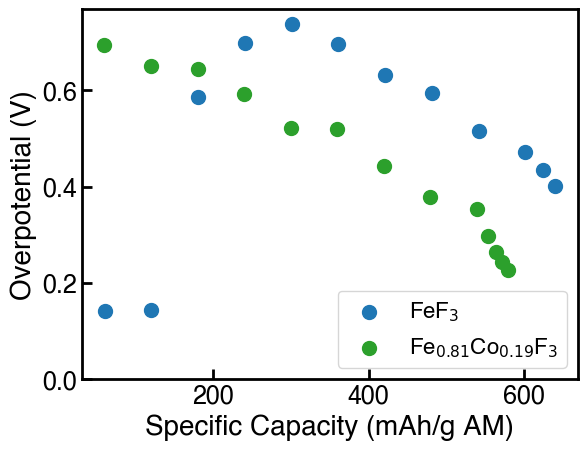

In [49]:
cm = plt.get_cmap('tab10')
plt.scatter(FeF3_GITT['Specific Capacity Total AM'], FeF3_GITT['Overpotential'], label='FeF$_3$', color=cm(0))
# plt.axhline(FeF3_avg_overpotential, linestyle='--', color=cm(0))
# plt.scatter(MnF3_GITT['Specific Capacity Total AM']+(1*26801/132.76), MnF3_GITT['Overpotential'], label='MnF$_3$', color=cm(1))
# plt.axhline(MnF3_avg_overpotential, linestyle='--', color=cm(1))
plt.scatter(FeCo_GITT['Specific Capacity Total AM']+(0*0.19*26801/134.25), FeCo_GITT['Overpotential'], label='Fe$_{0.81}$Co$_{0.19}$F$_3$', color=cm(2))
# plt.axhline(FeCo_avg_overpotential, linestyle='--', color=cm(2))
plt.legend()
plt.xlabel('Specific Capacity (mAh/g AM)')
plt.ylabel('Overpotential (V)')
plt.ylim(bottom=0)
plt.show()

['../../Li-FeF3-25CB-C1-CCPP/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h.csv']


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:196: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file))


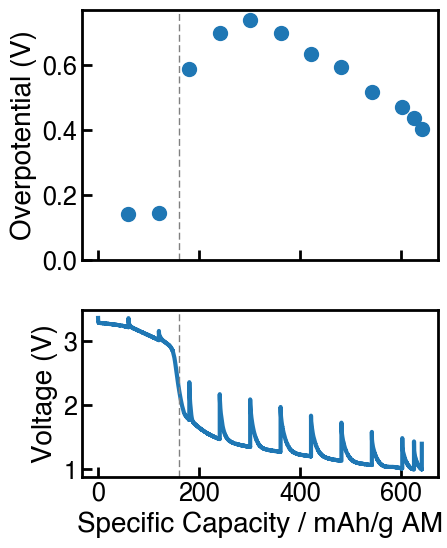

In [90]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5,6), height_ratios=[1.5,1])

cm = plt.get_cmap('tab10')
ax[0].scatter(FeF3_GITT['Specific Capacity Total AM'], FeF3_GITT['Overpotential'], label='FeF$_3$', color=cm(0))
ax[0].set_ylabel('Overpotential (V)')
ax[0].set_ylim(bottom=0)

cell_ids = ['056A']
data_files = []
for id in cell_ids:
    csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
    data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    data_files.append(data_file)
print(data_files)

cycle = 0 # Cycle to plot
plot_multi_cell(data_files, cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist(),
                fig=fig, ax=ax[0],
                norm='full_mass') # Use fill_value to adjust cycle #
plt.gca().get_lines()[0].set_color(cm(0))
for i, _ in enumerate(ax):
    ax[i].axvline(160, color='gray', linestyle='--', linewidth=1)
plt.show()

['../../Li-FeF3-25CB-C1-CCPP/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h.csv', '../../Li-Fe0p81Co0p19F3-25CB-C1-CCPP/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h/outputs/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h.csv']


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:196: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file))
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:196: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file))


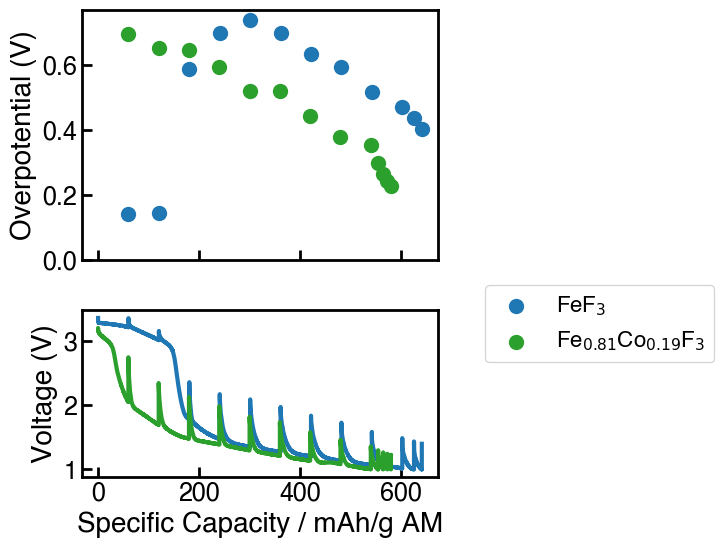

In [50]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5,6), height_ratios=[1.5,1])

cm = plt.get_cmap('tab10')
ax[0].scatter(FeF3_GITT['Specific Capacity Total AM'], FeF3_GITT['Overpotential'], label='FeF$_3$', color=cm(0))
# plt.axhline(FeF3_avg_overpotential, linestyle='--', color=cm(0))
# plt.scatter(MnF3_GITT['Specific Capacity Total AM']+(1*26801/132.76), MnF3_GITT['Overpotential'], label='MnF$_3$', color=cm(1))
# plt.axhline(MnF3_avg_overpotential, linestyle='--', color=cm(1))
ax[0].scatter(FeCo_GITT['Specific Capacity Total AM']+(0*0.19*26801/134.25), FeCo_GITT['Overpotential'], label='Fe$_{0.81}$Co$_{0.19}$F$_3$', color=cm(2))
# plt.axhline(FeCo_avg_overpotential, linestyle='--', color=cm(2))
ax[0].set_ylabel('Overpotential (V)')
ax[0].set_ylim(bottom=0)
fig.legend(loc='upper left', bbox_to_anchor=(1,0.5))

cell_ids = ['056A','052B']
data_files = []
for id in cell_ids:
    csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
    data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    data_files.append(data_file)
print(data_files)

cycle = 0 # Cycle to plot
fig, ax = plot_multi_cell(data_files, cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist(),
                fig=fig, ax=ax[0],
                norm='full_mass') # Use fill_value to adjust cycle #
plt.gca().get_lines()[0].set_color(cm(0))
plt.gca().get_lines()[1].set_color(cm(2))
plt.show()

['../../Li-FeF3-25CB-C1-CCPP/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h.csv', '../../Li-Fe0p75Mn0p25F3-25CB-C1-CCPP/250211-CC053J-C50_1V_4p4V-GITT_10SoC_6h/outputs/250211-CC053J-C50_1V_4p4V-GITT_10SoC_6h.csv']


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:196: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if fig == None and ax == None:
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:196: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if fig == None and ax == None:


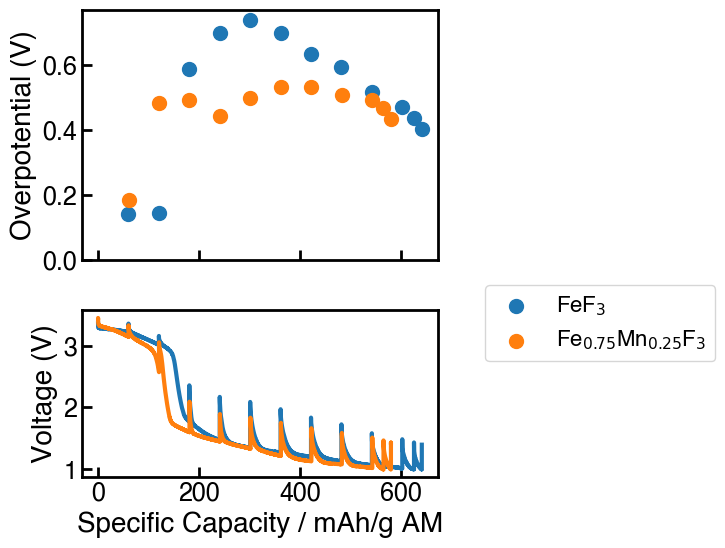

In [150]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5,6), height_ratios=[1.5,1])

cm = plt.get_cmap('tab10')
ax[0].scatter(FeF3_GITT['Specific Capacity Total AM'], FeF3_GITT['Overpotential'], label='FeF$_3$', color=cm(0))
# plt.axhline(FeF3_avg_overpotential, linestyle='--', color=cm(0))
# plt.scatter(MnF3_GITT['Specific Capacity Total AM']+(1*26801/132.76), MnF3_GITT['Overpotential'], label='MnF$_3$', color=cm(1))
# plt.axhline(MnF3_avg_overpotential, linestyle='--', color=cm(1))
ax[0].scatter(Mn25_GITT['Specific Capacity Total AM'], Mn25_GITT['Overpotential'], label='Fe$_{0.75}$Mn$_{0.25}$F$_3$', color=cm(1))
# plt.axhline(FeCo_avg_overpotential, linestyle='--', color=cm(2))
ax[0].set_ylabel('Overpotential (V)')
ax[0].set_ylim(bottom=0)
fig.legend(loc='upper left', bbox_to_anchor=(1,0.5))

cell_ids = ['056A','053J']
data_files = []
for id in cell_ids:
    csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
    data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    data_files.append(data_file)
print(data_files)

cycle = 0 # Cycle to plot
fig, ax = plot_multi_cell(data_files, cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist(),
                fig=fig, ax=ax[0],
                norm='full_mass') # Use fill_value to adjust cycle #
plt.gca().get_lines()[0].set_color(cm(0))
plt.gca().get_lines()[1].set_color(cm(1))
plt.show()

['../../PROPEL-1K/Li-FeF3-25CB-C1-CCPP/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h.csv', '../../PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057A-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC057A-C50-1V-4p4V_CV-GITT_10SoC_6h.csv', '../../PROPEL-1K/Li-Fe0p56Mn0p44F3-25CB-C1-CCPP/250211-CC055D-C50_1V_4p4V-GITT_10SoC_6h/outputs/250211-CC055D-C50_1V_4p4V-GITT_10SoC_6h.csv']


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:201: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs.append(pd.read_csv(file))


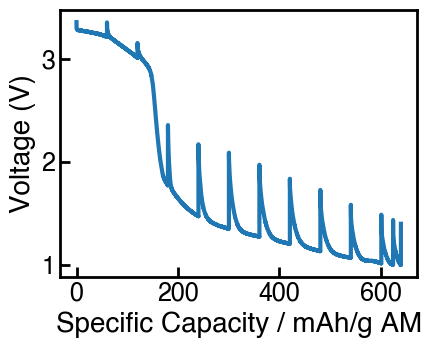

In [10]:
cell_ids = ['056A','057A','055D']
data_files = []
for id in cell_ids:
    csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
    data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    data_files.append(data_file)
print(data_files)

fig, ax = plt.subplots(figsize=(5,4))
cm = plt.get_cmap('tab10')
cycle = 0 # Cycle to plot
fig, ax = plot_multi_cell(data_files[:1], cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist(),
                fig=fig, ax=ax,
                norm='full_mass') # Use fill_value to adjust cycle #
plt.gca().get_lines()[0].set_color(cm(0))
# plt.gca().get_lines()[1].set_color(cm(1))
# plt.gca().get_lines()[2].set_color(cm(5))
plt.show()

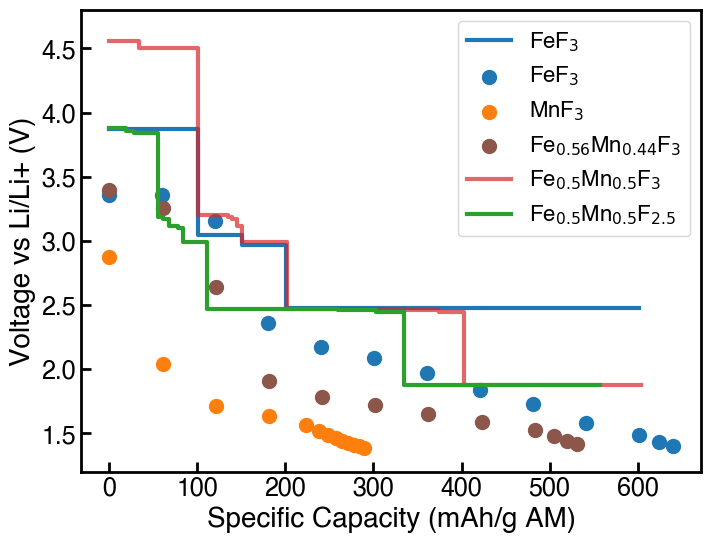

In [43]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
cm = plt.get_cmap('tab10')

step = 4
if step > 0:
    cap_FeF3 = [0, 100.33, 133.78, 150.5, 160.53, 200.67, 602]
    v_FeF3 = [3.87, 3.87, 3.05, 3.05, 2.97, 2.97, 2.48]
    ax.step(cap_FeF3, v_FeF3, '-', label=r'FeF$_3$', color=cm(0), alpha=1)
    ax.scatter(FeF3_GITT['Specific Capacity Total AM'], FeF3_GITT['OCV'], label='FeF$_3$', color=cm(0))

if step > 1:
    cap_MnF3 = [0, 50.5, 101, 151.5, 202, 606]
    v_MnF3 = [4.62, 4.62, 4.53, 3.77, 3.75, 1.88]
    # ax.step(cap_MnF3, v_MnF3, '-', label=r'MnF$_3$', color=cm(1), alpha=1)
    ax.scatter((MnF3_GITT['Specific Capacity Total AM']), MnF3_GITT['OCV'], label='MnF$_3$', color=cm(1))

if step > 2:
    ax.scatter((Mn44_GITT['Specific Capacity Total AM']), Mn44_GITT['OCV'], label='Fe$_{0.56}$Mn$_{0.44}$F$_3$', color=cm(5))

if step > 4:
    cap_MnFe5F18 = [0, 100.33, 111.48, 113.07, 115.20, 116.55, 150.50, 178.37, 200.67, 245.26, 334.44, 423.63, 468.22, 494.98, 525.56, 535.11, 602.00]
    v_MnFe5F18 = [4.03, 4.03, 3.20, 3.19, 3.17, 3.12, 3.07, 2.97, 2.97, 2.48, 2.48, 2.48, 2.48, 2.47, 2.46, 2.45, 1.88]
    ax.step(cap_MnFe5F18, v_MnFe5F18, '-', label=r'Fe$_{0.83}$Mn$_{0.17}$F$_{3}$', color=cm(4), alpha=0.7)

if step > 3:
    cap_MnFeF6 = [0, 33.56, 100.67, 134.22, 139.02, 145.41, 149.47, 151, 161.07, 201.33, 281.87, 311.15, 335.56, 373.9, 402.67, 604]
    v_MnFeF6 = [4.56, 4.56, 4.5, 3.2, 3.19, 3.17, 3.12, 3.12, 2.99, 2.99, 2.47, 2.47, 2.47, 2.46, 2.45, 1.88]
    ax.step(cap_MnFeF6, v_MnFeF6, '-', label=r'Fe$_{0.5}$Mn$_{0.5}$F$_3$', color=cm(3), alpha=0.7)

    cap_MnFeF5 = [0, 18.57, 27.85, 55.7, 61, 68.08, 72.58, 77.98, 83.55, 111.4, 200.52, 232.93, 259.93, 302.37, 334.2, 557]
    v_MnFeF5 = [3.88, 3.88, 3.86, 3.84, 3.19, 3.17, 3.12, 3.12, 3.1, 2.99, 2.47, 2.47, 2.47, 2.46, 2.45, 1.88]
    ax.step(cap_MnFeF5, v_MnFeF5, '-', label=r'Fe$_{0.5}$Mn$_{0.5}$F$_{2.5}$', color=cm(2), alpha=1)

ax.set_ylabel('Voltage vs Li/Li+ (V)')
ax.set_ylim(1.2,4.8)
ax.set_xlabel(r'Specific Capacity (mAh/g AM)')

plt.legend()
plt.show()

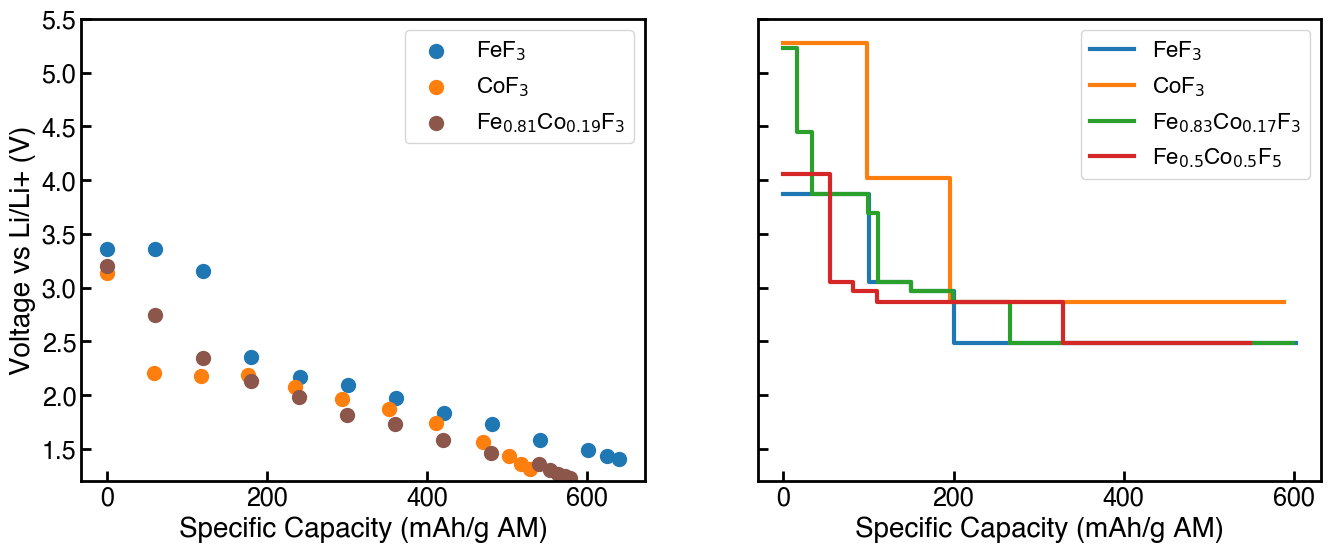

In [49]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,6),sharey=True)
cm = plt.get_cmap('tab10')

step = 4
if step > 0:
    cap_FeF3 = [0, 100.33, 133.78, 150.5, 160.53, 200.67, 602]
    v_FeF3 = [3.87, 3.87, 3.05, 3.05, 2.97, 2.97, 2.48]
    ax[1].step(cap_FeF3, v_FeF3, '-', label=r'FeF$_3$', color=cm(0))
    ax[0].scatter(FeF3_GITT['Specific Capacity Total AM'], FeF3_GITT['OCV'], label=r'FeF$_3$', color=cm(0))

if step > 1:
    cap_CoF3 = [0, 98, 196, 588]
    v_CoF3 = [5.28, 5.28, 4.02, 2.87]
    ax[1].step(cap_CoF3, v_CoF3, '-', label=r'CoF$_3$', color=cm(1))
    ax[0].scatter(CoF3_GITT['Specific Capacity Total AM'], CoF3_GITT['OCV'], label=r'CoF$_3$', color=cm(1))

if step > 2:
    cap_FeCo = [0,16.63888889,33.27777778,99.83333333,110.9259259,149.75,199.6666667,266.2222222,599]
    v_FeCo = [5.23,5.23,4.45,3.87,3.69,3.05,2.97,2.87,2.48]
    ax[1].step(cap_FeCo, v_FeCo, label=r'Fe$_{0.83}$Co$_{0.17}$F$_3$', color=cm(2))
    ax[0].scatter(FeCo_GITT['Specific Capacity Total AM'], FeCo_GITT['OCV'], label=r'Fe$_{0.81}$Co$_{0.19}$F$_3$', color=cm(5))

if step > 3:
    cap_CoFeF5 = [0, 54.8, 82.2, 109.6, 328.8, 548]
    v_CoFeF5 = [4.06, 4.06, 3.05, 2.97, 2.87, 2.48]
    ax[1].step(cap_CoFeF5, v_CoFeF5, '-', label=r'Fe$_{0.5}$Co$_{0.5}$F$_5$', color=cm(3))

    cap_CoFeF6 = [0, 39.67, 49.58, 99.17, 132.22, 148.75, 198.33, 396.67, 595]
    v_CoFeF6 = [5.3, 5.3, 5.23, 4.45, 3.69, 3.05, 2.97, 2.87, 2.48]
    # ax[1].step(cap_CoFeF6, v_CoFeF6, '-', label=r'CoFeF$_6$', color=cm(4))

    cap_CoFe7F20 = [0, 13.825, 55.3, 82.95, 110.6, 165.9, 553]
    v_CoFe7F20 = [3.95, 3.95, 3.79, 3.05, 2.97, 2.87, 2.48]
    # ax[1].step(cap_CoFe7F20, v_CoFe7F20, '-', label=r'Fe$_{0.875}$Co$_{0.125}$F$_{2.5}$', color=cm(3))

ax[0].set_ylabel('Voltage vs Li/Li+ (V)')
ax[0].set_ylim(1.2,5.5)
ax[0].set_xlabel('Specific Capacity (mAh/g AM)')
ax[1].set_xlabel('Specific Capacity (mAh/g AM)')
ax[1].set_xticks(np.arange(0,800,200))

ax[0].legend()
ax[1].legend()
plt.show()

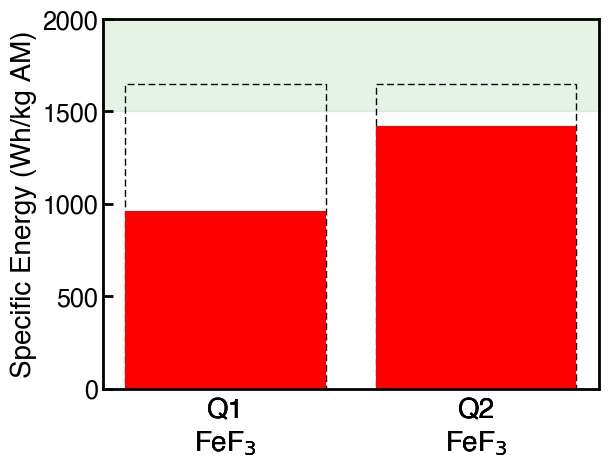

In [165]:
bar_labels = [
              'Q1\nFeF$_3$', 
              'Q2\nFeF$_3$'
              ]
x = [
     0,0,0,
     1,1,1
     ]
y = [
     1650,959,823,
     1650,FeF3_gitt_energy,FeF3_disch_energy
     ]

fig, ax = plt.subplots()
bars = ax.bar(x, y, color=['white','red','red'])
plt.xticks([])

plt.axhspan(1500, 2000, color='g', alpha=0.1)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, -50, bar_labels[int(np.floor(i/3))], ha='center', va='top', fontsize=20)
    if i % 3 == 0:
            bar.set_edgecolor('black')
            bar.set_linestyle('--')
plt.ylim(0,2000)
plt.ylabel('Specific Energy (Wh/kg AM)')
plt.show()

In [ ]:
# Overlay multiple cycling curves

cell_ids = ['056A','037D']
data_files = []
for id in cell_ids:
    csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
    data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    data_files.append(data_file)
print(data_files)

cycle = 0 # Cycle to plot
fig, ax = plot_multi_cell(data_files, cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist(),
                fig=fig, ax=ax,
                norm='full_mass') # Use fill_value to adjust cycle #
plt.gca().get_lines()[0].set_color(cm(0))
plt.gca().get_lines()[1].set_color(cm(1))
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Q2 FeF$_3$', 'Q1 FeF$_3$']
plt.legend(handles, new_labels)
plt.show()

# cell_ids = ['056A','053J','052B']
# data_files = []
# cm = plt.get_cmap('tab10')

# fig1, ax1 = plt.subplots()
# cycles = [0]
# for i, id in enumerate(cell_ids):
#     data_files.append(os.path.join(id_to_path(id), 'outputs'))
#     dfs[id] = df
#     ec.charge_discharge_plot(df, cycles, norm='full_mass', fig=fig1, ax=ax1)
# # plt.ylim(1,4.2)
# plt.show()

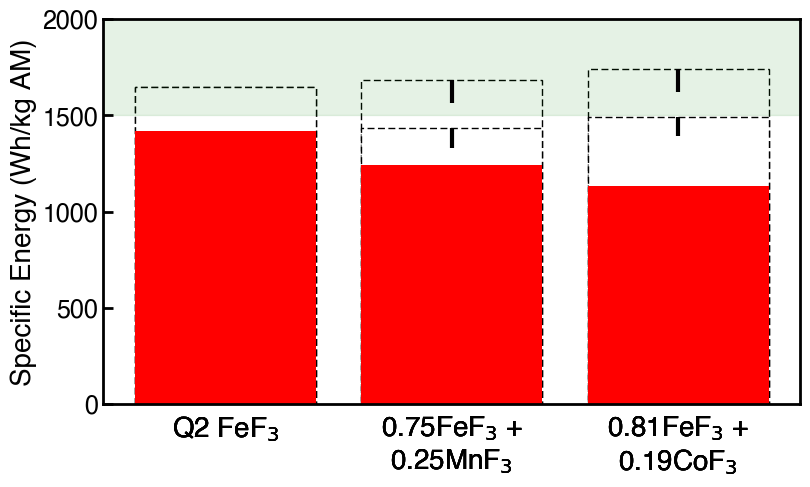

In [170]:
bar_labels = [
              'Q2 FeF$_3$', 
              '0.75FeF$_3$ +\n0.25MnF$_3$', 
              '0.81FeF$_3$ +\n0.19CoF$_3$'
              ]
# For each category, show 
# 1) theoretical energy (upper bound)
# 2) theoretical energy (lower bound)
# 3) OCV-based energy
# 4) discharge energy
x = [
     0,0,0,0,
     1,1,1,1,
     2,2,2,2
     ]
y = [
     1650,1650,FeF3_gitt_energy,FeF3_disch_energy,
     1682.5,1432.7,Mn25_gitt_energy,Mn25_disch_energy,
     1742.4,1494.4,FeCo_gitt_energy,FeCo_disch_energy
     ]
y_err = [
      [0,0,0,0,
       120,100,0,0,
       120,100,0,0],
      [0,0,0,0,
       0,0,0,0,
       0,0,0,0]
]

fig, ax = plt.subplots(figsize=(9,5))
bars = ax.bar(x, y, color=['white','white','red','red'], yerr=y_err)
plt.xticks([])

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, -50, bar_labels[int(np.floor(i/4))], ha='center', va='top', fontsize=20)
    if i % 4 == 0 or i % 4 == 1:
            bar.set_edgecolor('black')
            bar.set_linestyle('--')
plt.axhspan(1500, 2000, color='g', alpha=0.1)
plt.ylim(0,2000)
plt.ylabel('Specific Energy (Wh/kg AM)')
plt.show()

['../../Li-FeF3-25CB-C1-CCPP/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC056A-C50-1V-4p4V_CV-GITT_10SoC_6h.csv', '../../Li-Fe0p75Mn0p25F3-25CB-C1-CCPP/250211-CC053J-C50_1V_4p4V-GITT_10SoC_6h/outputs/250211-CC053J-C50_1V_4p4V-GITT_10SoC_6h.csv', '../../Li-Fe0p81Co0p19F3-25CB-C1-CCPP/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h/outputs/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h.csv']


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:196: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if fig == None and ax == None:
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:196: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if fig == None and ax == None:
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:196: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if fig == None and ax == None:


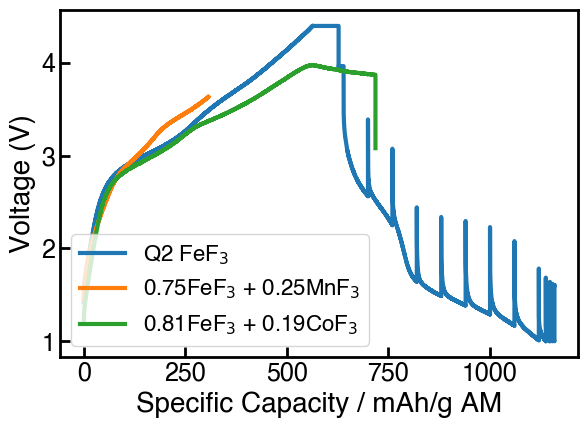

In [166]:
# Overlay multiple cycling curves

cell_ids = ['056A','053J','052B']
data_files = []
for id in cell_ids:
    csv_files = glob.glob(os.path.join(id_to_path(id), 'outputs', '*.csv'))
    data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    data_files.append(data_file)
print(data_files)

cycle = 0 # Cycle to plot
fig, ax = plot_multi_cell(data_files, cycles=np.full((len(cell_ids),1), fill_value=cycle).tolist(),
                fig=fig, ax=ax,
                norm='full_mass') # Use fill_value to adjust cycle #
plt.gca().get_lines()[0].set_color(cm(0))
plt.gca().get_lines()[1].set_color(cm(1))
plt.gca().get_lines()[2].set_color(cm(2))
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Q2 FeF$_3$', 
              '0.75FeF$_3$ + 0.25MnF$_3$', 
              '0.81FeF$_3$ + 0.19CoF$_3$']
plt.legend(handles, new_labels)
plt.show()

# cell_ids = ['056A','053J','052B']
# data_files = []
# cm = plt.get_cmap('tab10')

# fig1, ax1 = plt.subplots()
# cycles = [0]
# for i, id in enumerate(cell_ids):
#     data_files.append(os.path.join(id_to_path(id), 'outputs'))
#     dfs[id] = df
#     ec.charge_discharge_plot(df, cycles, norm='full_mass', fig=fig1, ax=ax1)
# # plt.ylim(1,4.2)
# plt.show()

In [137]:
print(cells_df.loc[['056F']][['Specific discharge energy 0', 'Max specific discharge energy', 'Discharge energy retention 0,1']])

            Specific discharge energy 0  Max specific discharge energy  \
Identifier                                                               
056F                         903.045531                     903.045531   

            Discharge energy retention 0,1  
Identifier                                  
056F                              0.867983  


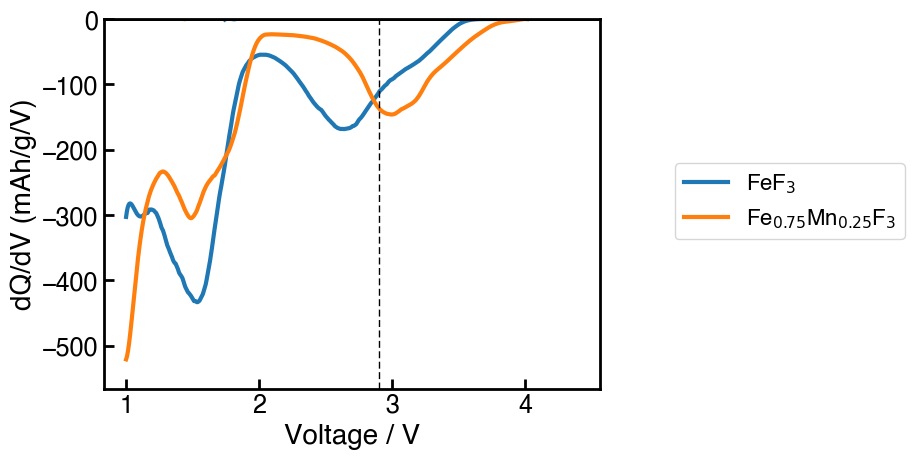

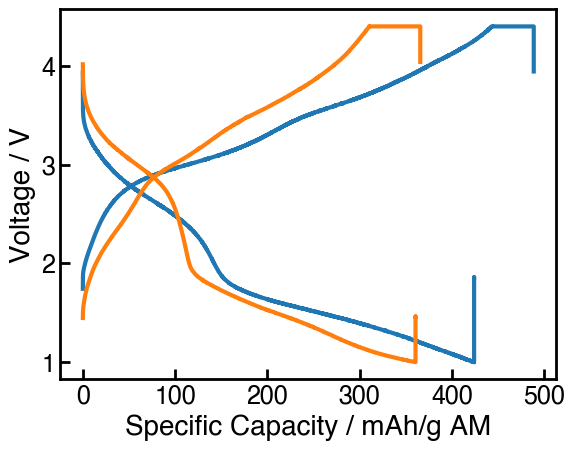

In [38]:
# Overlay multiple dQ/dV plots

cell_ids = ['CC056F','CC053G'] # CC063A is Mn0.1, CC055A is Mn0.44
labels = ['FeF$_3$','Fe$_{0.75}$Mn$_{0.25}$F$_3$']
dfs = {}
dfs_for_dqdv = {}
data_files = []

for id in cell_ids:
    data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
    data_files.append(data_file)
    dir_name = os.path.join(id_to_path(id), 'outputs')
    df, df_sum, df_for_dqdv = parse_cycle_csv(dir_name)
    dfs[id] = df
    dfs_for_dqdv[id] = df_for_dqdv

fig, ax = multi_cell_dqdv_plot(list(dfs_for_dqdv.values()),
                            colormap='tab10',
                            # halfcycles=[1,2], # Uncomment to show 0th discharge and 1st charge
                            cycle=1, # Uncomment to show 1st charge and discharge
                            capacity_label='Specific Capacity Total AM', 
                            labels=labels)
plt.ylim(top=0)
# cm = ax.get_cmap()
for x in [2.90]:
    ax.axvline(x, color='k', linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)
plt.show()

fig1, ax1 = plt.subplots()
cycles = [1]
for i, df in enumerate(dfs.values()):
    ec.charge_discharge_plot(df, cycles, norm='full_mass', fig=fig1, ax=ax1)
    plt.gca().get_lines()[2*i].set_color(cm(i))
    plt.gca().get_lines()[2*i+1].set_color(cm(i))
ax1.get_legend().remove()
# plt.ylim(1,4.2)
plt.show()

/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


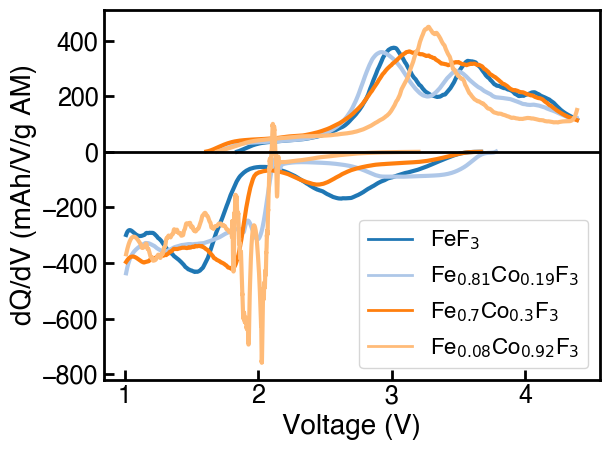

In [12]:
# Overlay multiple dQ/dV plots

cell_ids = ['CC056F','CC052E','CC065B','CC054B']
labels = ['FeF$_3$','Fe$_{0.81}$Co$_{0.19}$F$_3$','Fe$_{0.7}$Co$_{0.3}$F$_3$','Fe$_{0.08}$Co$_{0.92}$F$_3$']
dfs = {}

for id in cell_ids:
    dir_name = os.path.join(id_to_path(id), 'outputs')
    df, df_sum = parse_cycle_csv(dir_name)
    dfs[id] = df

fig, ax = plot_dqdv(dfs,
                    colormap='tab20',
                    # halfcycles=[1,2], # Uncomment to show 0th discharge and 1st charge
                    cycles=1, # Uncomment to show 1st charge and discharge
                    capacity_col='Specific Capacity Total AM', 
                    labels=labels)
# plt.ylim(bottom=-2000)
# cm = ax.get_cmap()
# for x in [2.66, 2.90]:
#     plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)
/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:359: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


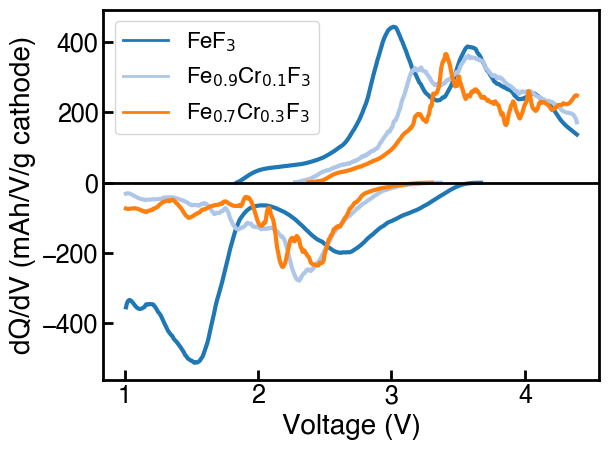

In [13]:
# Overlay multiple dQ/dV plots

cell_ids = ['CC056F','CC060A','CC061A']
labels = ['FeF$_3$','Fe$_{0.9}$Cr$_{0.1}$F$_3$','Fe$_{0.7}$Cr$_{0.3}$F$_3$']
dfs = {}

for id in cell_ids:
    dir_name = os.path.join(id_to_path(id), 'outputs')
    df, df_sum = parse_cycle_csv(dir_name)
    dfs[id] = df

fig, ax = plot_dqdv(dfs,
                    colormap='tab20',
                    # halfcycles=[1,2], # Uncomment to show 0th discharge and 1st charge
                    cycles=1, # Uncomment to show 1st charge and discharge
                    capacity_col='Specific Capacity', 
                    labels=labels)
# plt.ylim(bottom=-2000)
# cm = ax.get_cmap()
# for x in [2.66, 2.90]:
#     plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

0.7236064


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Specific Capacity / mAh/g AM', ylabel='Voltage / V'>)

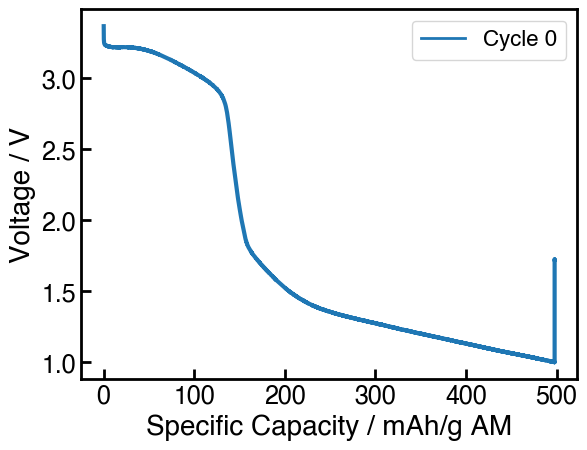

In [141]:
dir_name = os.path.join(id_to_path('CC056F'), 'outputs')
df, df_sum = parse_cycle_csv(dir_name)

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'].astype(str) == '1'
rest_mask = df['state'].astype(str) == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)
df_no_CV_Mn0 = df_for_dqdv

cc056f_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc056f_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0], norm='full_mass')
# plot_cycle(dir_name, full_cycles=[0,1,2])
# ec.multi_dqdv_plot(df_for_dqdv, cycles=[0,1,2,5], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

1.07891984
['../../PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/cycle_summary.csv', '../../PROPEL-1K/Li-MnF3-25CB-C1-CCPP/241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h/outputs/241217-CC057B-C50-1V-4p4V_CV-GITT_10SoC_6h.csv']


/Users/eschl/Dropbox (MIT)/MIT/_Grad/Thesis/Data/herald_visualization/herald_visualization/plot.py:124: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Capacity / mAh', ylabel='Voltage vs Li/Li+ (V)'>)

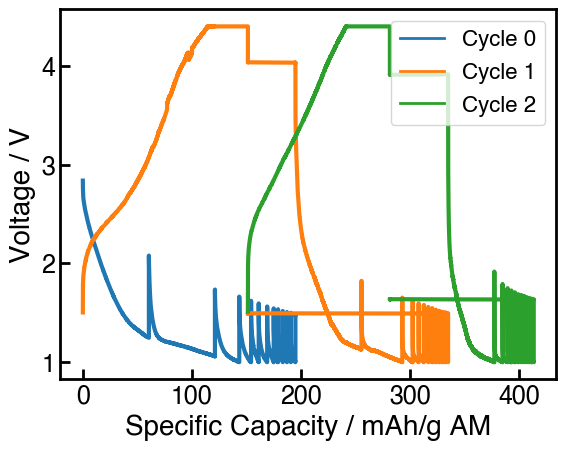

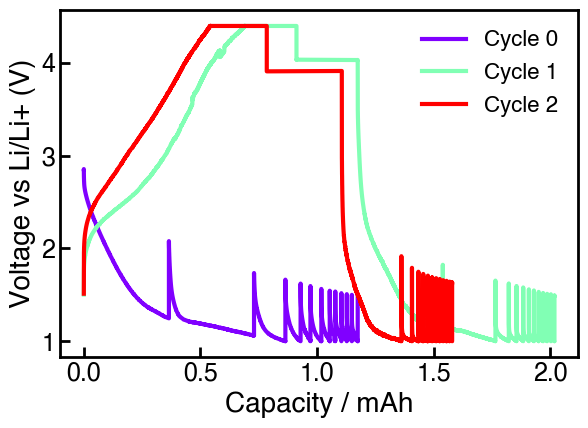

In [142]:
dir_name = os.path.join(id_to_path('CC057B'), 'outputs')
df, df_sum = parse_cycle_csv(dir_name)

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'].astype(str) == '1'
rest_mask = df['state'].astype(str) == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

# cc056e_full_cap = df_sum['Specific Discharge Capacity Total AM']
# cc056e_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,2], norm='full_mass')
plot_cycle(dir_name, full_cycles=[0,1,2])
# ec.multi_dqdv_plot(df_for_dqdv, cycles=[0,1,2,5], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)


['../../PROPEL-1K/Li-Fe0p75Mn0p25F3-25CB-C1-CCPP/241206-CC053G-C20-1V-4p5V_CV/outputs/241206-CC053G-C20-1V-4p5V_CV.csv', '../../PROPEL-1K/Li-Fe0p75Mn0p25F3-25CB-C1-CCPP/241206-CC053G-C20-1V-4p5V_CV/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_34893/3160123570.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


0.41812364


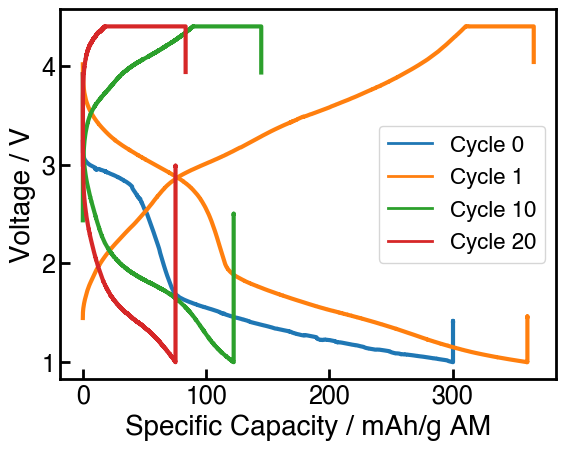

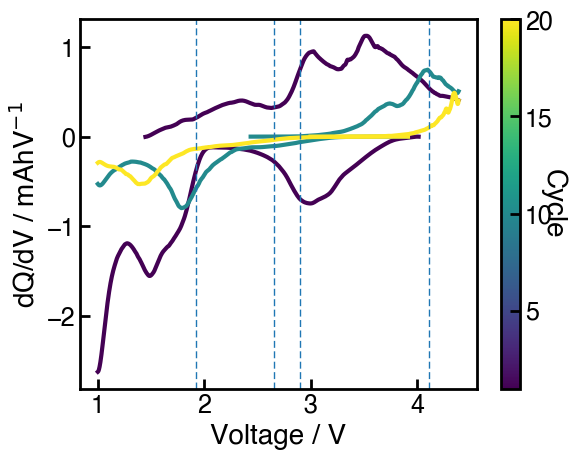

In [143]:
dir_name = os.path.join(id_to_path('CC053G'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV_Mn25 = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]
df_sum_Mn25_cha = df_sum

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc053g_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc053g_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,10,20], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV_Mn25, cycles=[1,10,20], polynomial_spline=1)
for x in [1.92, 2.66, 2.90, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

['../../PROPEL-1K/Li-Fe0p75Mn0p25(LiF)3-25CB-C1-CCPP/250113-CC059A-C20-4p4V_CV-1V/outputs/250113-CC059A-C20-4p4V_CV-1V.csv', '../../PROPEL-1K/Li-Fe0p75Mn0p25(LiF)3-25CB-C1-CCPP/250113-CC059A-C20-4p4V_CV-1V/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_34893/2158191025.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


nan


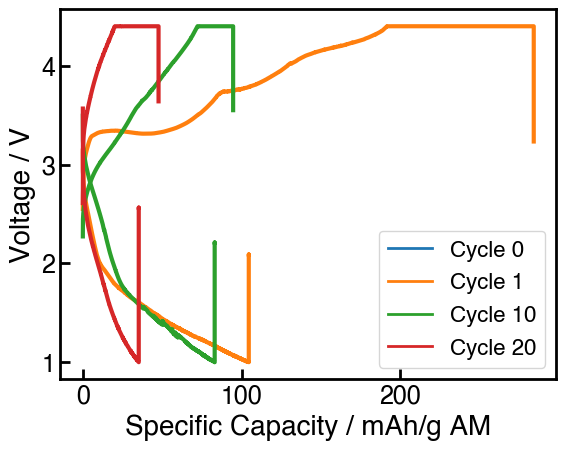

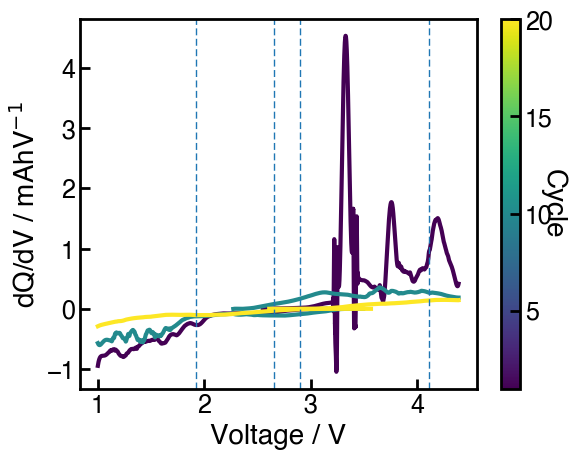

In [144]:
dir_name = os.path.join(id_to_path('CC059A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]
df_sum_Mn25_disch = df_sum

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc059a_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc059a_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,10,20], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV, cycles=[1,10,20], polynomial_spline=1)
for x in [1.92, 2.66, 2.90, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

['../../PROPEL-1K/Li-Fe0p56Mn0p44F3-25CB-C1-CCPP/241206-CC055A-C20-1V-4p4V_CV/outputs/241206-CC055A-C20-1V-4p4V_CV.csv', '../../PROPEL-1K/Li-Fe0p56Mn0p44F3-25CB-C1-CCPP/241206-CC055A-C20-1V-4p4V_CV/outputs/cycle_summary.csv', '../../PROPEL-1K/Li-Fe0p56Mn0p44F3-25CB-C1-CCPP/241206-CC055A-C20-1V-4p4V_CV/outputs/241206-CC055A-C20-1V-4p4V_CV_01_PEIS_C14.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_34893/111068332.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


0.44473476


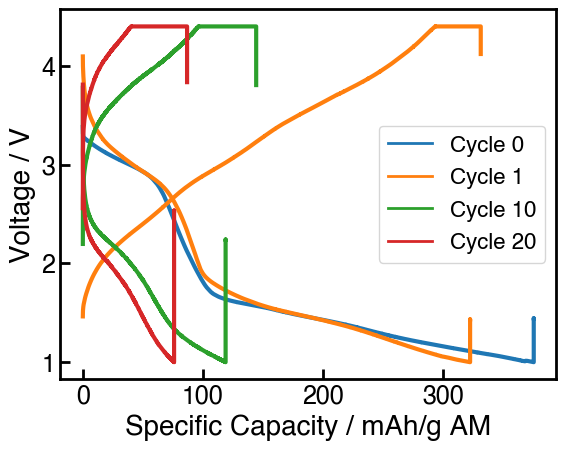

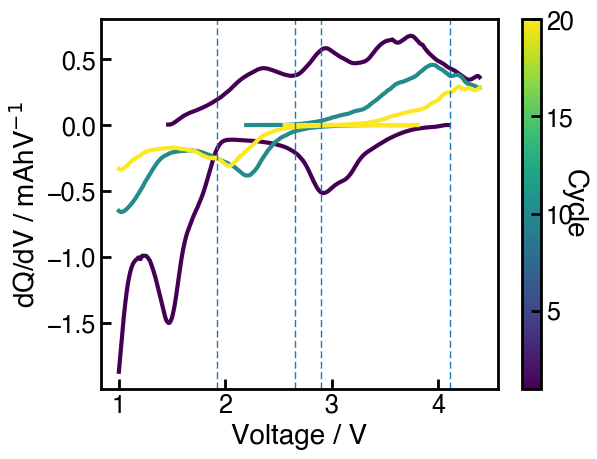

In [145]:
dir_name = os.path.join(id_to_path('CC055A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV_Mn44 = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]
df_sum_Mn44_cha = df_sum

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc055a_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc055a_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,10,20], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV_Mn44, cycles=[1,10,20], polynomial_spline=1)
for x in [1.92, 2.66, 2.90, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

['../../PROPEL-1K/Li-Fe0p56Mn0p44(LiF)3-25CB-C1-CCPP/250113-CC058A-C20-4p4V_CV-1V/outputs/250113-CC058A-C20-4p4V_CV-1V.csv', '../../PROPEL-1K/Li-Fe0p56Mn0p44(LiF)3-25CB-C1-CCPP/250113-CC058A-C20-4p4V_CV-1V/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_34893/3472204921.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


nan


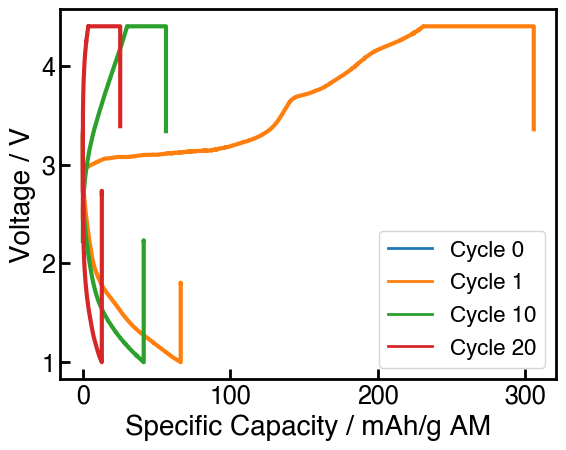

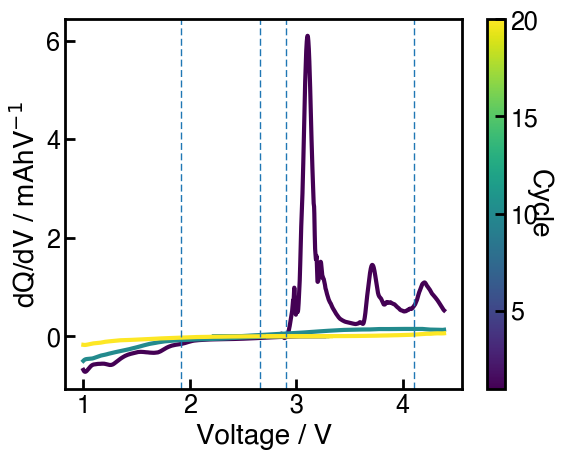

In [146]:
dir_name = os.path.join(id_to_path('CC058A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV = df_no_ocv[df_no_ocv['Voltage'] < df_sum.loc[1, 'UCV'] - 0.01]
df_sum_Mn44_disch = df_sum

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc058a_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc058a_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,10,20], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV, cycles=[1,10,20], polynomial_spline=1)
for x in [1.92, 2.66, 2.90, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

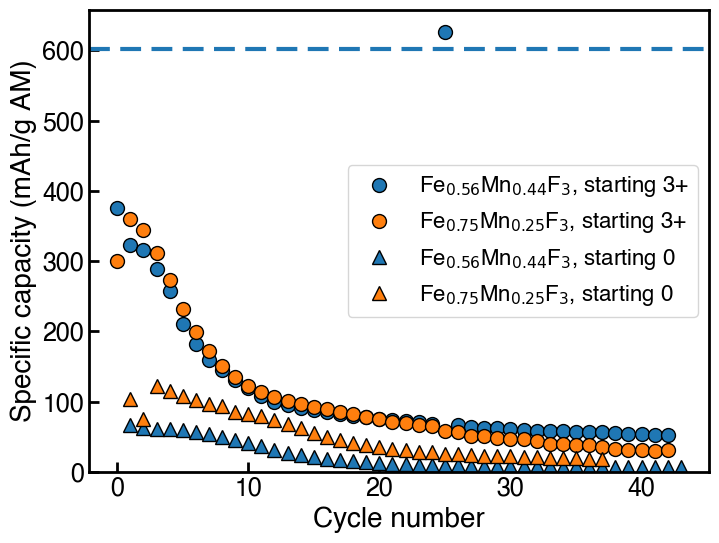

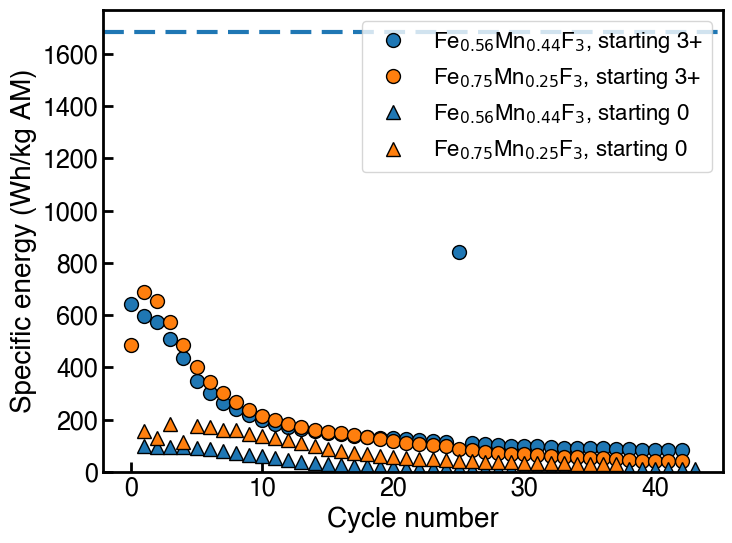

In [147]:
cmap = plt.get_cmap('tab10')

plt.figure(figsize=[8,6])
plt.plot(df_sum_Mn44_cha['Specific Discharge Capacity Total AM'], 'o', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$, starting 3+', color=cmap(0))
plt.plot(df_sum_Mn25_cha['Specific Discharge Capacity Total AM'], 'o', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$, starting 3+', color=cmap(1))
plt.plot(df_sum_Mn44_disch['Specific Discharge Capacity Total AM'], '^', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$, starting 0', color=cmap(0))
plt.plot(df_sum_Mn25_disch['Specific Discharge Capacity Total AM'], '^', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$, starting 0', color=cmap(1))
plt.axhline(601.5, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific capacity (mAh/g AM)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.plot(df_sum_Mn44_cha['Specific Discharge Energy Total AM'], 'o', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$, starting 3+', color=cmap(0))
plt.plot(df_sum_Mn25_cha['Specific Discharge Energy Total AM'], 'o', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$, starting 3+', color=cmap(1))
plt.plot(df_sum_Mn44_disch['Specific Discharge Energy Total AM'], '^', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$, starting 0', color=cmap(0))
plt.plot(df_sum_Mn25_disch['Specific Discharge Energy Total AM'], '^', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$, starting 0', color=cmap(1))
plt.axhline(1684, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific energy (Wh/kg AM)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

0.6729305699999999


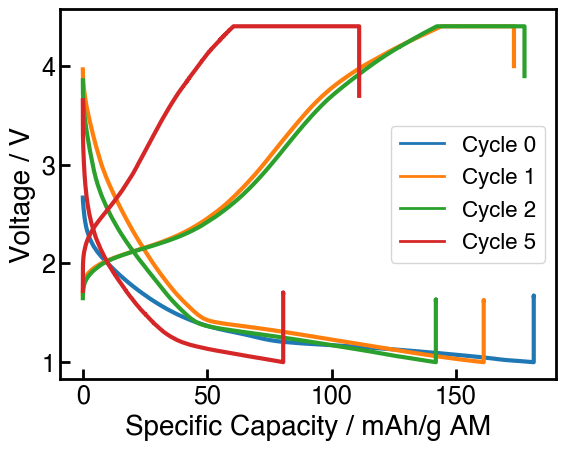

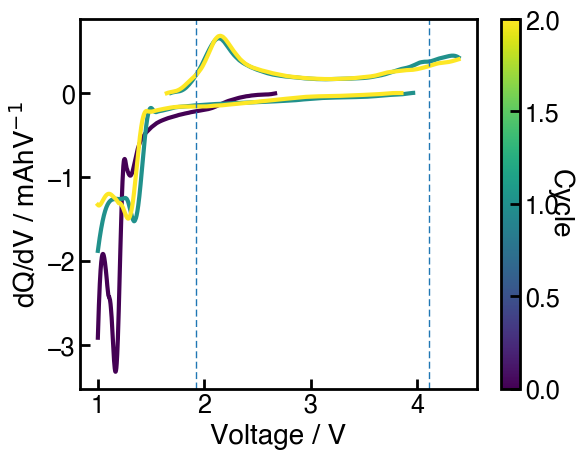

In [143]:
dir_name = os.path.join(id_to_path('CC057C'), 'outputs')
df, df_sum, df_for_dqdv = parse_cycle_csv(dir_name)
df_no_CV_Mn100 = df_for_dqdv

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc057c_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc057c_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,2,5], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV_Mn100, cycles=[0,1,2], polynomial_spline=1)
for x in [1.92, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

0.6695339599999999


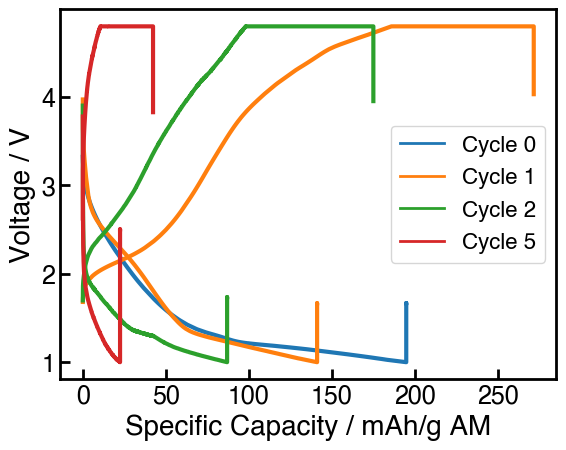

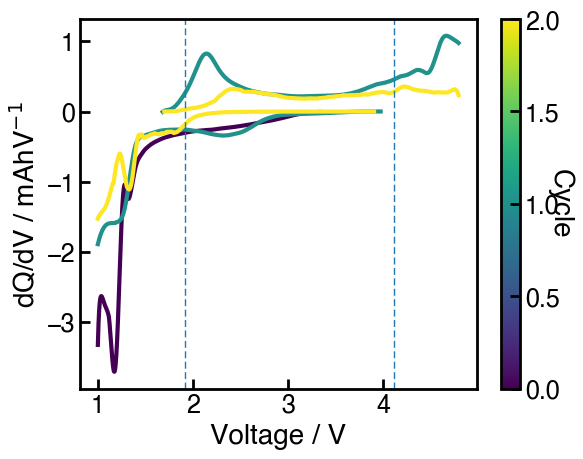

In [149]:
dir_name = os.path.join(id_to_path('CC057E'), 'outputs')
df, df_sum = parse_cycle_csv(dir_name)
df_no_CV_Mn100_highV = df_for_dqdv

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'].astype(str) == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc057e_full_cap = df_sum['Specific Discharge Capacity Total AM']
cc057e_energy = df_sum['Specific Discharge Energy Total AM']

ec.charge_discharge_plot(df, cycles=[0,1,2,5], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV_Mn100_highV, cycles=[0,1,2], polynomial_spline=1)
for x in [1.92, 4.11]:
    plt.axvline(x, linestyle='--', linewidth=1)

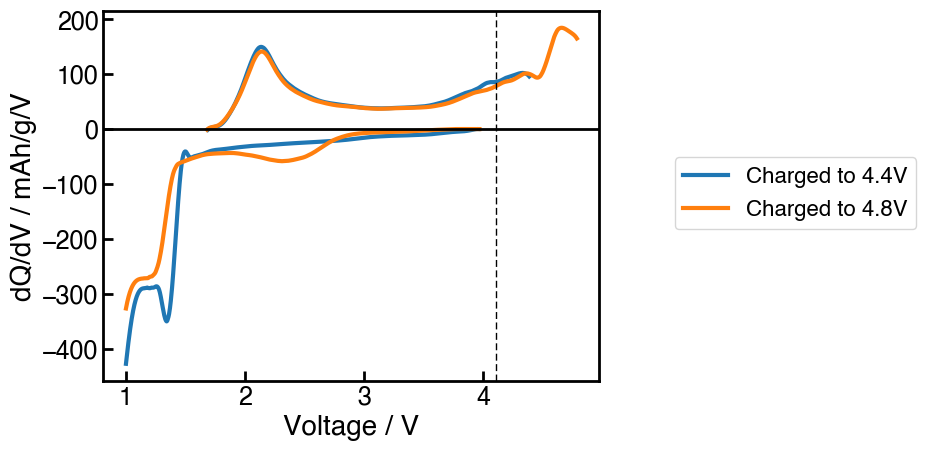

In [150]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn100, df_no_CV_Mn100_highV],
                             # halfcycles=[1,2],
                             cycle=1,
                             capacity_label='Specific Capacity', 
                             labels=['Charged to 4.4V', 'Charged to 4.8V'])
plt.axvline(4.11, color='k', linestyle='--', linewidth=1)
# plt.ylim(-400, 200)
cm = plt.get_cmap('tab10')
# for x in [2.66, 2.90]:
#     plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color='black', linestyle='--', linewidth=1)

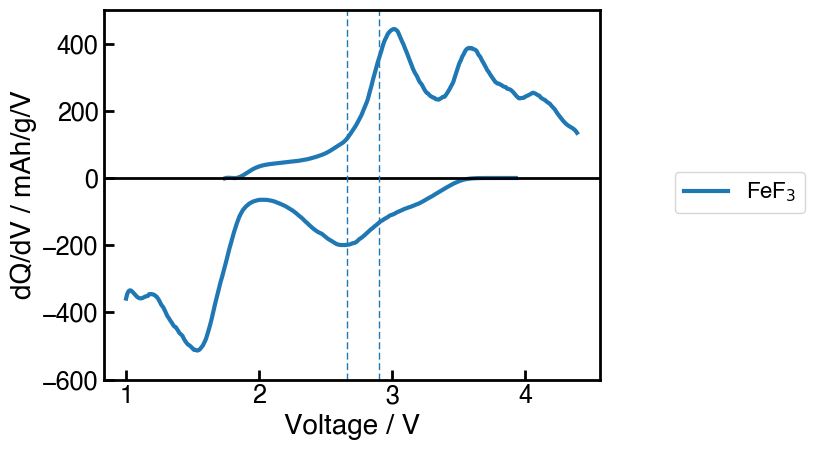

In [151]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn0],
                             capacity_label='Specific Capacity', 
                             labels=['FeF$_3$'])
plt.ylim(-600, 500)
for x in [2.66, 2.90]:
    plt.axvline(x, linestyle='--', linewidth=1)

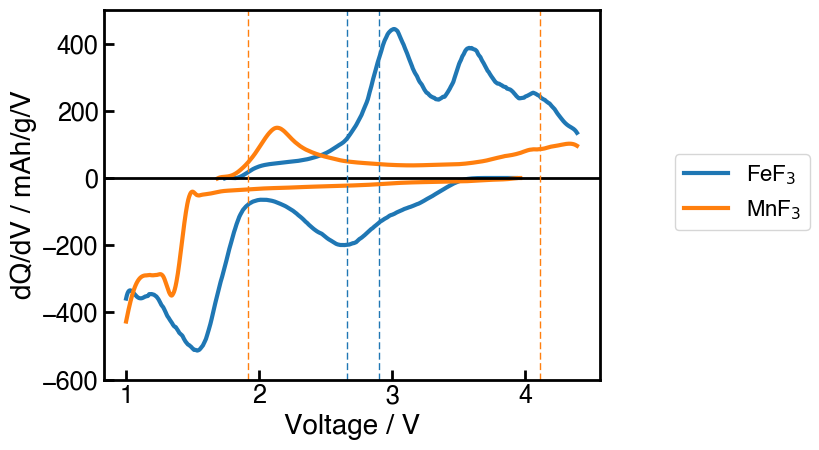

In [152]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn0, df_no_CV_Mn100],
                             capacity_label='Specific Capacity', 
                             labels=['FeF$_3$', 'MnF$_3$'])
plt.ylim(-600, 500)
cm = plt.get_cmap('tab10')
for x in [2.66, 2.90]:
    plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
for x in [1.92, 4.11]:
    plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

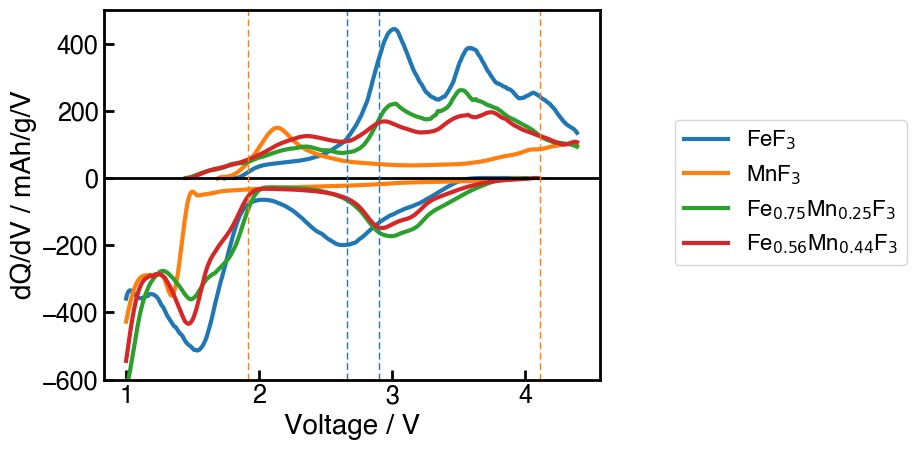

In [153]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn0, df_no_CV_Mn100, df_no_CV_Mn25, df_no_CV_Mn44],
                             capacity_label='Specific Capacity', 
                             labels=['FeF$_3$', 'MnF$_3$', 'Fe$_{0.75}$Mn$_{0.25}$F$_3$', 'Fe$_{0.56}$Mn$_{0.44}$F$_3$'])
plt.ylim(-600, 500)
cm = plt.get_cmap('tab10')
for x in [2.66, 2.90]:
    plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
for x in [1.92, 4.11]:
    plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

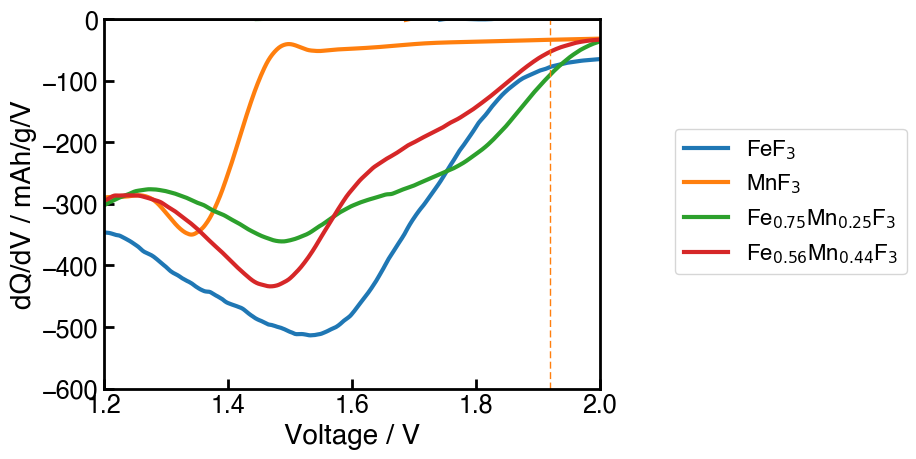

In [154]:
fig, ax = multi_cell_dqdv_plot([df_no_CV_Mn0, df_no_CV_Mn100, df_no_CV_Mn25, df_no_CV_Mn44],
                             capacity_label='Specific Capacity', 
                             labels=['FeF$_3$', 'MnF$_3$', 'Fe$_{0.75}$Mn$_{0.25}$F$_3$', 'Fe$_{0.56}$Mn$_{0.44}$F$_3$'])
plt.ylim(-600, 0)
plt.xlim(1.2, 2)
cm = plt.get_cmap('tab10')
for x in [2.66, 2.90]:
    plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
for x in [1.92, 4.11]:
    plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

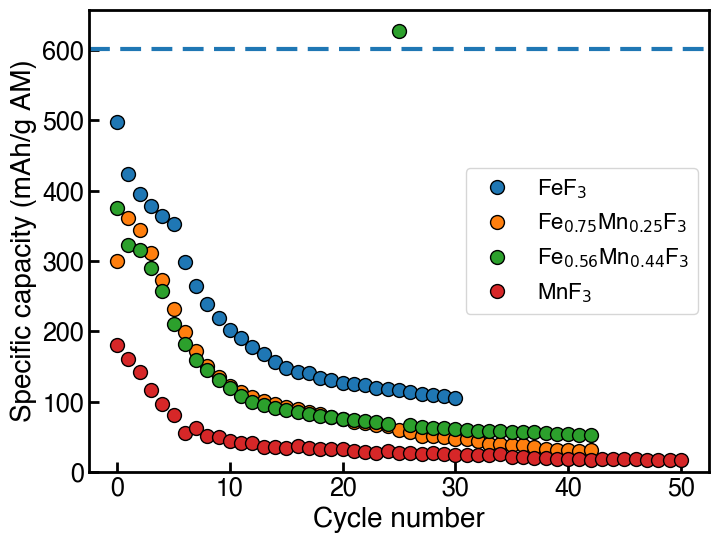

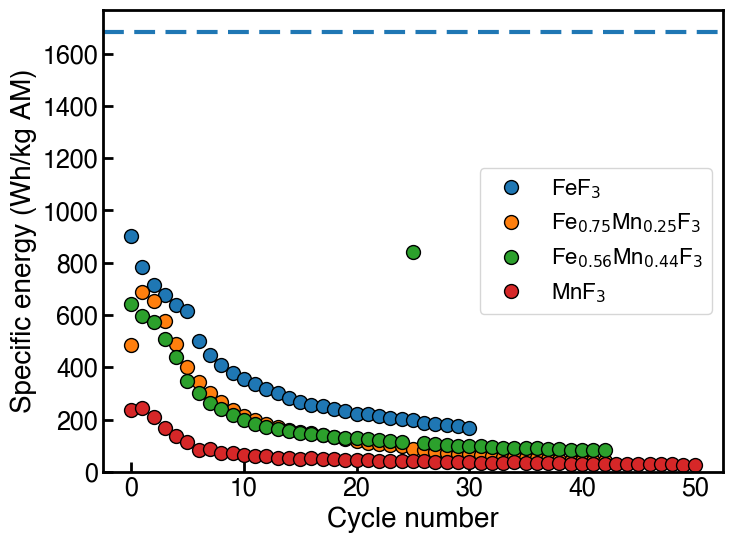

In [155]:
plt.figure(figsize=[8,6])
plt.plot(cc056f_full_cap, 'o', label='FeF$_3$')
plt.plot(cc053g_full_cap, 'o', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$')
plt.plot(cc055a_full_cap, 'o', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$')
plt.plot(cc057c_full_cap, 'o', label='MnF$_3$')
plt.axhline(601.5, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific capacity (mAh/g AM)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

plt.figure(figsize=[8,6])
plt.plot(cc056f_energy, 'o', label='FeF$_3$')
plt.plot(cc053g_energy, 'o', label='Fe$_{0.75}$Mn$_{0.25}$F$_3$')
plt.plot(cc055a_energy, 'o', label='Fe$_{0.56}$Mn$_{0.44}$F$_3$')
plt.plot(cc057c_energy, 'o', label='MnF$_3$')
plt.axhline(1684, linestyle='--')
plt.xlabel('Cycle number')
plt.ylabel('Specific energy (Wh/kg AM)')
plt.ylim(bottom=0)
plt.legend()
plt.show()

In [156]:
print(cells_df.loc[['056F','053G','055A','057C']][['Specific discharge energy 0', 'Max specific discharge energy', 'Discharge energy retention 0,1', 'Average discharge energy retention 0,5']])

            Specific discharge energy 0  Max specific discharge energy  \
Identifier                                                               
056F                         903.045531                     903.045531   
053G                         484.484041                     687.078891   
055A                         643.237288                     842.516073   
057C                         237.691458                     246.376788   

            Discharge energy retention 0,1  \
Identifier                                   
056F                              0.867983   
053G                              1.418166   
055A                              0.925990   
057C                              1.036540   

            Average discharge energy retention 0,5  
Identifier                                          
056F                                      0.925715  
053G                                      0.963556  
055A                                      0.884573  
057C         

2.35463057


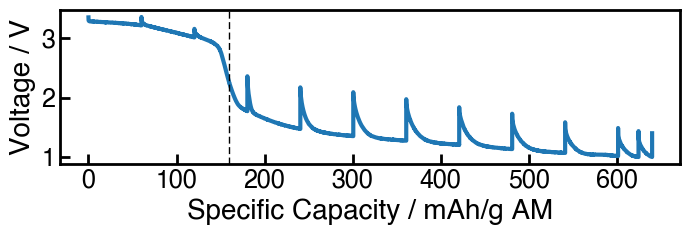

In [44]:
dir_name = os.path.join(id_to_path('CC056A'), 'outputs')
df, df_sum = parse_cycle_csv(dir_name)

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'].astype(str) == '1'
rest_mask = df['state'].astype(str) == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

fig, ax = plt.subplots(figsize=(8,2))
ec.charge_discharge_plot(df, cycles=[0], norm='full_mass', fig=fig, ax=ax)
ax.axvline(160, color='k', linestyle='--', linewidth=1)
ax.get_legend().remove()
# ec.multi_dqdv_plot(df_for_dqdv, cycles=[0], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

['../../PROPEL-1K/Li-Fe0p08Co0p92F3-25CB-C1-CCPP/241206-CC054A-C20-1V-4p4V_CV/outputs/241206-CC054A-C20-1V-4p4V_CV.csv', '../../PROPEL-1K/Li-Fe0p08Co0p92F3-25CB-C1-CCPP/241206-CC054A-C20-1V-4p4V_CV/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_34893/1412836196.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


1.03892915


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Voltage / V', ylabel='dQ/dV / mAhV$^{-1}$'>)

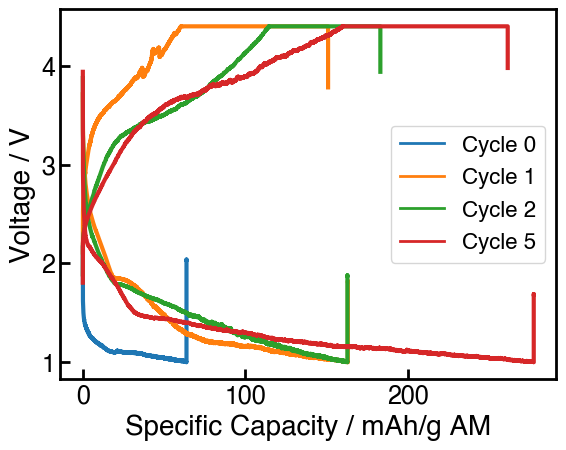

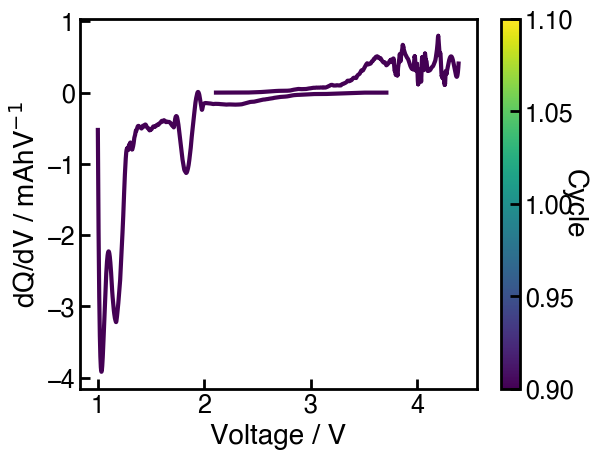

In [158]:
dir_name = os.path.join(id_to_path('CC054A'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV_Fe8Co92 = df_no_ocv[df_no_ocv['Voltage'] < 4.39]

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

cc054a_full_cap = df_sum['Specific Discharge Capacity']
cc054a_energy = df_sum['Specific Discharge Energy']

ec.charge_discharge_plot(df, cycles=[0,1,2,5], norm='full_mass')
ec.multi_dqdv_plot(df_no_CV_Fe8Co92, cycles=[1], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

NameError: name 're' is not defined

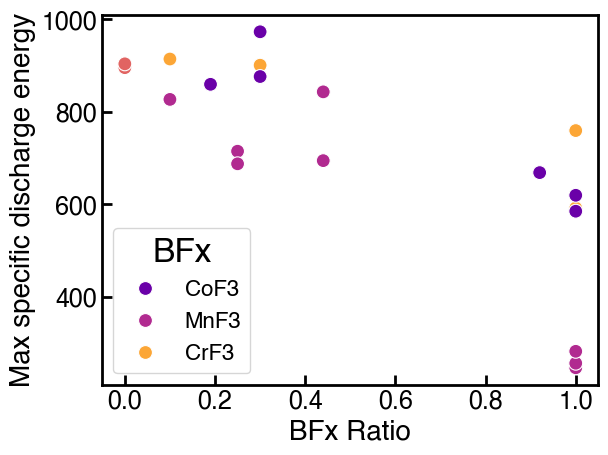

In [82]:
afx_mask = cells_df['AFx'] == 'FeF3'
lcv_mask = cells_df['LCV'] < 1.1
cells_df['BFx'] = cells_df['BFx'].fillna('') # Allows for rows without BFx filled in to be plotted
df1 = cells_df[afx_mask & lcv_mask]
df1 = df1.drop(bad_ids, errors='ignore') # Drop any bad cells

sn.scatterplot(data=df1, x='BFx Ratio', y='Max specific discharge energy', hue='BFx', palette='plasma')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [subscript_formula(label) for label in labels]
plt.legend(handles, new_labels, title='BF$_x$', bbox_to_anchor=(0.7,0.0), loc='lower center')
plt.xlim(0,1)
plt.xlabel('BF$_x$ concentration')
plt.show()

sn.scatterplot(data=df1, x='BFx Ratio', y='Max specific discharge capacity', hue='BFx', palette='plasma')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [subscript_formula(label) for label in labels]
plt.legend(handles, new_labels, title='BF$_x$', bbox_to_anchor=(0.7,0.0), loc='lower center')
plt.xlim(0,1)
plt.xlabel('BF$_x$ concentration')
plt.show()

sn.scatterplot(data=df1, x='BFx Ratio', y='Average discharge capacity retention 0,5', hue='BFx', palette='plasma')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [subscript_formula(label) for label in labels]
plt.legend(handles, new_labels, title='BF$_x$', bbox_to_anchor=(0.7,0.0), loc='lower center')
plt.xlim(0,1)
plt.axhline(1, color='k', linestyle='--') 
plt.xlabel('BF$_x$ concentration')
plt.show()

df2 = df1.loc[df1.groupby('Cathode')['Discharge overpotential 0'].idxmin()]
sn.scatterplot(data=df1, x='BFx Ratio', y='Discharge overpotential 0', hue='BFx', palette='plasma')
sn.lineplot(data=df2, x='BFx Ratio', y='Discharge overpotential 0', hue='BFx', palette='plasma', linestyle='--', legend=False)
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [subscript_formula(label) for label in labels]
plt.legend(handles, new_labels, title='BF$_x$', bbox_to_anchor=(0.7,0.0), loc='lower center')
plt.xlim(0,1)
plt.ylim(0,1.05)
plt.ylabel('Discharge overpotential (V)')
plt.axhline(1, color='k', linestyle='--')
plt.xlabel('BF$_x$ concentration')
plt.show()

sn.scatterplot(data=df1, x='Average discharge energy retention 0,5', y='Max specific discharge energy', style='BFx', hue='BFx Ratio')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [subscript_formula(label) for label in labels]
plt.legend(handles, new_labels, title='BF$_x$', bbox_to_anchor=(1.2,0.0), loc='lower center')
plt.show()

In [60]:
print(cells_df[cells_df['LCV'] > 1.1])

            Date Made  Channel NB Entry Creator                      Cathode  \
Identifier                                                                     
052F        1/30/2025   4100-3      NaN      CE      Cat043 (Fe0.81Co0.19F3)   
053H        1/30/2025  4100-14      NaN      CE      Cat045 (Fe0.75Mn0.25F3)   
058A        1/13/2025      NaN      NaN      CE  Cat051 (Fe0.56Mn0.44(LiF)3)   
058B        1/13/2025      NaN      NaN      CE  Cat051 (Fe0.56Mn0.44(LiF)3)   
058C        1/16/2025      NaN      NaN      CE  Cat051 (Fe0.56Mn0.44(LiF)3)   
059A        1/13/2025      NaN      NaN      CE  Cat052 (Fe0.75Mn0.25(LiF)3)   
059B        1/13/2025      NaN      NaN      CE  Cat052 (Fe0.75Mn0.25(LiF)3)   
059C        1/16/2025      NaN      NaN      CE  Cat052 (Fe0.75Mn0.25(LiF)3)   
064A        1/25/2025      NaN      NaN      RH          Cat061 (FeS2/FeS/S)   
064B        1/26/2025      NaN      NaN      RH          Cat061 (FeS2/FeS/S)   

                 AFx       BFx  BFx Rat

In [81]:
df2 = cells_df[afx_mask & cells_df['LCV'] > 1.1]
df2 = df2.drop(bad_ids, errors='ignore') # Drop any bad cells

sn.scatterplot(data=df2, x='Average discharge energy retention 0,5', y='Max specific discharge energy', style='BFx', hue='BFx Ratio')
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [subscript_formula(label) for label in labels]
plt.legend(handles, new_labels, title='BF$_x$', bbox_to_anchor=(1.2,0.0), loc='lower center')
plt.show()

NameError: name 'afx_mask' is not defined

In [160]:
cells_df[cells_df['AFx'] == 'FeF3'].sort_values(by='Max specific discharge energy', ascending=False).iloc[:20]

Date Made  Channel NB Entry Creator  \
Identifier                                         
065B         1/30/2025   4100-7      NaN      CE   
060C         2/11/2025  4095-16      NaN      CE   
056F          1/2/2025      NaN      NaN      RH   
061D         2/11/2025  4095-10      NaN      CE   
056E          1/2/2025      NaN      NaN      RH   
065A         1/30/2025   4100-5      NaN      CE   
052E         1/30/2025  4100-10      NaN      CE   
055A         12/5/2024      NaN      NaN      CE   
063A         1/16/2025   4100-9      NaN      RH   
053E         12/5/2024      NaN      NaN      CE   
055C         1/30/2025   4100-2      NaN      CE   
053G         12/5/2024      NaN      NaN      CE   
054B         12/5/2024      NaN      NaN      CE   
069B         2/12/2025   4095-4      NaN      CE   
068D          2/7/2025  4100-16      NaN      CE   
069D         2/12/2025   4095-6      NaN      CE   
053H         1/30/2025  4100-14      NaN      CE   
052F         1/30/2025   4100-3      NaN      CE   
054A         12/5/2024      NaN      NaN      CE   
052A        11/25/2024      NaN      NaN      CE   

                                      Cathode   AFx   BFx  BFx Ratio  \
Identifier                                                             
065B                    Cat048 (Fe0.7Co0.3F3)  FeF3  CoF3       0.30   
060C                    Cat053 (Fe0.9Cr0.1F3)  FeF3  CrF3       0.10   
056F                 Cat049 (FeF3 24h milled)  FeF3             0.00   
061D                    Cat054 (Fe0.7Cr0.3F3)  FeF3  CrF3       0.30   
056E                 Cat049 (FeF3 24h milled)  FeF3             0.00   
065A                    Cat048 (Fe0.7Co0.3F3)  FeF3  CoF3       0.30   
052E                  Cat043 (Fe0.81Co0.19F3)  FeF3  CoF3       0.19   
055A                  Cat046 (Fe0.56Mn0.44F3)  FeF3  MnF3       0.44   
063A        Cat047 (Fe0.9Mn0.1F3 100h milled)  FeF3  MnF3       0.10   
053E                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
055C                  Cat046 (Fe0.56Mn0.44F3)  FeF3  MnF3       0.44   
053G                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
054B                  Cat044 (Fe0.08Co0.92F3)  FeF3  CoF3       0.92   
069B                            Cat065 (CoF3)  FeF3  CoF3       1.00   
068D                            Cat064 (CrF3)  FeF3  CrF3       1.00   
069D                            Cat065 (CoF3)  FeF3  CoF3       1.00   
053H                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
052F                  Cat043 (Fe0.81Co0.19F3)  FeF3  CoF3       0.19   
054A                  Cat044 (Fe0.08Co0.92F3)  FeF3  CoF3       0.92   
052A                  Cat043 (Fe0.81Co0.19F3)  FeF3  CoF3       0.19   

            Cathode Diameter (cm) Cathode Total Mass (mg)  ...  \
Identifier                                                 ...   
065B                          1.6                    13.7  ...   
060C                          1.6                    15.3  ...   
056F                          1.6                    15.9  ...   
061D                          1.6                    13.4  ...   
056E                          1.6                    15.8  ...   
065A                          1.6                    14.2  ...   
052E                          1.6                    16.1  ...   
055A                          1.6                    14.4  ...   
063A                          1.6                    14.3  ...   
053E                          1.6                    15.4  ...   
055C                          1.6                    14.2  ...   
053G                          1.6                    15.8  ...   
054B                          1.6                    17.5  ...   
069B                          1.6                    19.7  ...   
068D                          1.6                      15  ...   
069D                          1.6                    20.5  ...   
053H                          1.6                    14.8  ...   
052F                         

In [161]:
cells_df[cells_df['AFx'] == 'FeF3'].sort_values(by='Discharge overpotential 0', ascending=True).iloc[:20]

Date Made  Channel NB Entry Creator  \
Identifier                                         
053H         1/30/2025  4100-14      NaN      CE   
053E         12/5/2024      NaN      NaN      CE   
053G         12/5/2024      NaN      NaN      CE   
055A         12/5/2024      NaN      NaN      CE   
065B         1/30/2025   4100-7      NaN      CE   
065A         1/30/2025   4100-5      NaN      CE   
054B         12/5/2024      NaN      NaN      CE   
061D         2/11/2025  4095-10      NaN      CE   
053A        11/25/2024      NaN      NaN      CE   
055C         1/30/2025   4100-2      NaN      CE   
052E         1/30/2025  4100-10      NaN      CE   
057E         1/16/2025      NaN      NaN      CE   
057C        12/17/2024      NaN      NaN      CE   
057D        12/17/2024      NaN      NaN      CE   
069B         2/12/2025   4095-4      NaN      CE   
069D         2/12/2025   4095-6      NaN      CE   
060C         2/11/2025  4095-16      NaN      CE   
056F          1/2/2025      NaN      NaN      RH   
068D          2/7/2025  4100-16      NaN      CE   
063A         1/16/2025   4100-9      NaN      RH   

                                      Cathode   AFx   BFx  BFx Ratio  \
Identifier                                                             
053H                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
053E                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
053G                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
055A                  Cat046 (Fe0.56Mn0.44F3)  FeF3  MnF3       0.44   
065B                    Cat048 (Fe0.7Co0.3F3)  FeF3  CoF3       0.30   
065A                    Cat048 (Fe0.7Co0.3F3)  FeF3  CoF3       0.30   
054B                  Cat044 (Fe0.08Co0.92F3)  FeF3  CoF3       0.92   
061D                    Cat054 (Fe0.7Cr0.3F3)  FeF3  CrF3       0.30   
053A                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
055C                  Cat046 (Fe0.56Mn0.44F3)  FeF3  MnF3       0.44   
052E                  Cat043 (Fe0.81Co0.19F3)  FeF3  CoF3       0.19   
057E                 Cat050 (MnF3 24h milled)  FeF3  MnF3       1.00   
057C                 Cat050 (MnF3 24h milled)  FeF3  MnF3       1.00   
057D                 Cat050 (MnF3 24h milled)  FeF3  MnF3       1.00   
069B                            Cat065 (CoF3)  FeF3  CoF3       1.00   
069D                            Cat065 (CoF3)  FeF3  CoF3       1.00   
060C                    Cat053 (Fe0.9Cr0.1F3)  FeF3  CrF3       0.10   
056F                 Cat049 (FeF3 24h milled)  FeF3             0.00   
068D                            Cat064 (CrF3)  FeF3  CrF3       1.00   
063A        Cat047 (Fe0.9Mn0.1F3 100h milled)  FeF3  MnF3       0.10   

            Cathode Diameter (cm) Cathode Total Mass (mg)  ...  \
Identifier                                                 ...   
053H                          1.6                    14.8  ...   
053E                          1.6                    15.4  ...   
053G                          1.6                    15.8  ...   
055A                          1.6                    14.4  ...   
065B                          1.6                    13.7  ...   
065A                          1.6                    14.2  ...   
054B                          1.6                    17.5  ...   
061D                          1.6                    13.4  ...   
053A                          1.6                    15.6  ...   
055C                          1.6                    14.2  ...   
052E                          1.6                    16.1  ...   
057E                          1.6                    18.4  ...   
057C                          1.6                    15.9  ...   
057D                          1.6                    18.1  ...   
069B                          1.6                    19.7  ...   
069D                          1.6                    20.5  ...   
060C                          1.6                    15.3  ...   
056F                         

In [162]:
cells_df[cells_df['AFx'] == 'FeF3'].sort_values(by='Average discharge energy retention 0,5', ascending=False).iloc[:20]

Date Made  Channel NB Entry Creator  \
Identifier                                         
053H         1/30/2025  4100-14      NaN      CE   
054A         12/5/2024      NaN      NaN      CE   
052F         1/30/2025   4100-3      NaN      CE   
052A        11/25/2024      NaN      NaN      CE   
053E         12/5/2024      NaN      NaN      CE   
053G         12/5/2024      NaN      NaN      CE   
052E         1/30/2025  4100-10      NaN      CE   
063A         1/16/2025   4100-9      NaN      RH   
056F          1/2/2025      NaN      NaN      RH   
056E          1/2/2025      NaN      NaN      RH   
055A         12/5/2024      NaN      NaN      CE   
065A         1/30/2025   4100-5      NaN      CE   
057C        12/17/2024      NaN      NaN      CE   
065B         1/30/2025   4100-7      NaN      CE   
055C         1/30/2025   4100-2      NaN      CE   
054B         12/5/2024      NaN      NaN      CE   
057E         1/16/2025      NaN      NaN      CE   
057D        12/17/2024      NaN      NaN      CE   
053A        11/25/2024      NaN      NaN      CE   
036A           6/19/24      NaN  CE1.194      CE   

                                      Cathode   AFx   BFx  BFx Ratio  \
Identifier                                                             
053H                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
054A                  Cat044 (Fe0.08Co0.92F3)  FeF3  CoF3       0.92   
052F                  Cat043 (Fe0.81Co0.19F3)  FeF3  CoF3       0.19   
052A                  Cat043 (Fe0.81Co0.19F3)  FeF3  CoF3       0.19   
053E                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
053G                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
052E                  Cat043 (Fe0.81Co0.19F3)  FeF3  CoF3       0.19   
063A        Cat047 (Fe0.9Mn0.1F3 100h milled)  FeF3  MnF3       0.10   
056F                 Cat049 (FeF3 24h milled)  FeF3             0.00   
056E                 Cat049 (FeF3 24h milled)  FeF3             0.00   
055A                  Cat046 (Fe0.56Mn0.44F3)  FeF3  MnF3       0.44   
065A                    Cat048 (Fe0.7Co0.3F3)  FeF3  CoF3       0.30   
057C                 Cat050 (MnF3 24h milled)  FeF3  MnF3       1.00   
065B                    Cat048 (Fe0.7Co0.3F3)  FeF3  CoF3       0.30   
055C                  Cat046 (Fe0.56Mn0.44F3)  FeF3  MnF3       0.44   
054B                  Cat044 (Fe0.08Co0.92F3)  FeF3  CoF3       0.92   
057E                 Cat050 (MnF3 24h milled)  FeF3  MnF3       1.00   
057D                 Cat050 (MnF3 24h milled)  FeF3  MnF3       1.00   
053A                  Cat045 (Fe0.75Mn0.25F3)  FeF3  MnF3       0.25   
036A                            Cat038 (FeF3)  FeF3              NaN   

            Cathode Diameter (cm) Cathode Total Mass (mg)  ...  \
Identifier                                                 ...   
053H                          1.6                    14.8  ...   
054A                          1.6                    19.1  ...   
052F                          1.6                    18.1  ...   
052A                          1.6                      15  ...   
053E                          1.6                    15.4  ...   
053G                          1.6                    15.8  ...   
052E                          1.6                    16.1  ...   
063A                          1.6                    14.3  ...   
056F                          1.6                    15.9  ...   
056E                          1.6                    15.8  ...   
055A                          1.6                    14.4  ...   
065A                          1.6                    14.2  ...   
057C                          1.6                    15.9  ...   
065B                          1.6                    13.7  ...   
055C                          1.6                    14.2  ...   
054B                          1.6                    17.5  ...   
057E                          1.6                    18.4  ...   
057D                         

['../../PROPEL-1K/Li-Fe0p81Co0p19F3-25CB-C1-CCPP/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h/outputs/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h.csv', '../../PROPEL-1K/Li-Fe0p81Co0p19F3-25CB-C1-CCPP/241126-CC052B-C50-1V-4p5V_CV-GITT_10SoC_6h/outputs/cycle_summary.csv']


/var/folders/45/z117g70n3_l3xzhnh36v3tqm0000gn/T/ipykernel_34893/2897526572.py:6: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_file)


1.7453215999999998


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Specific Capacity / mAh/g AM', ylabel='Voltage / V'>)

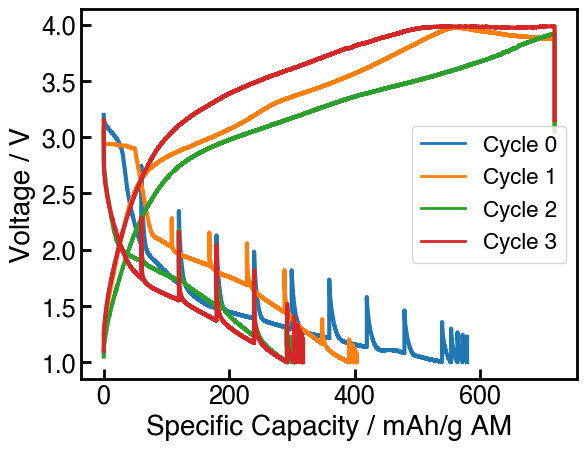

In [163]:
dir_name = os.path.join(id_to_path('CC052B'), 'outputs')
csv_files = glob.glob(os.path.join(dir_name,'*.csv'))
print(csv_files)
summary_file = os.path.join(dir_name,'cycle_summary.csv')
data_file = [file for file in csv_files if 'cycle_summary' not in file][0]
df = pd.read_csv(data_file)
df_sum = pd.read_csv(summary_file)
df_no_ocv = df[df['state'] != 'R']
df_no_CV = df_no_ocv[df_no_ocv['Voltage'] < 4.39]

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'] == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)

# cc054a_full_cap = df_sum['Specific Discharge Capacity']
# cc054a_energy = df_sum['Specific Discharge Energy']

ec.charge_discharge_plot(df, cycles=[0,1,2,3], norm='full_mass')
# ec.multi_dqdv_plot(df_no_CV, cycles=[0,1,2], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

0.6504957000000001


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Voltage / V', ylabel='dQ/dV / mAhV$^{-1}$'>)

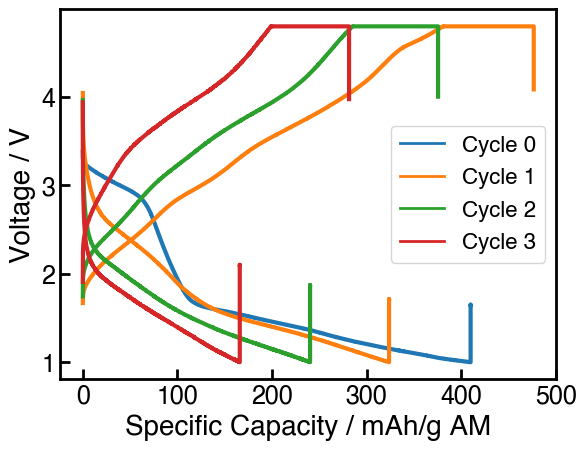

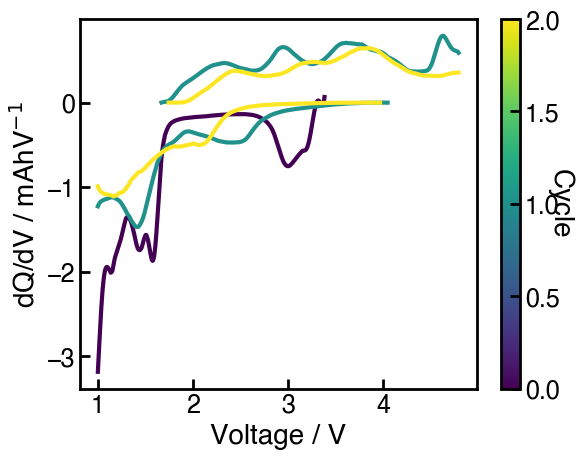

In [164]:
dir_name = os.path.join(id_to_path('CC055C'), 'outputs')
df, df_sum = parse_cycle_csv(dir_name)

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'].astype(str) == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)
dqdv_055C = df_for_dqdv

ec.charge_discharge_plot(df, cycles=[0,1,2,3], norm='full_mass')
ec.multi_dqdv_plot(df_for_dqdv, cycles=[0,1,2], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

0.44473476


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Voltage / V', ylabel='dQ/dV / mAhV$^{-1}$'>)

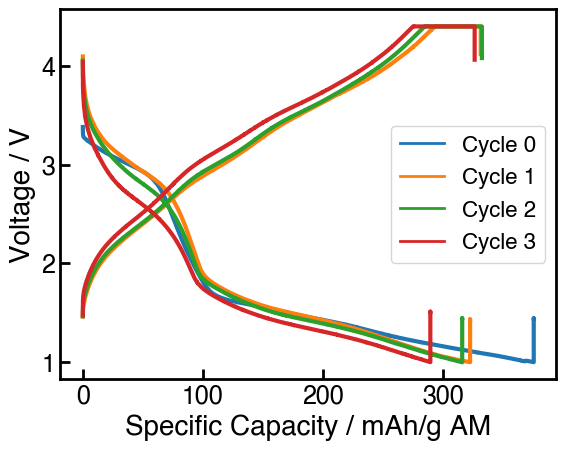

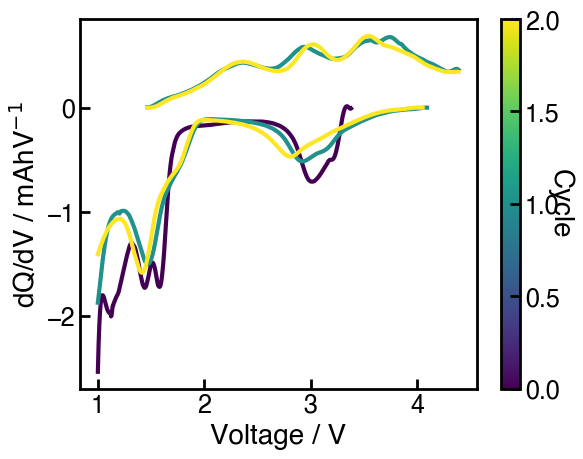

In [165]:
dir_name = os.path.join(id_to_path('CC055A'), 'outputs')
df, df_sum = parse_cycle_csv(dir_name)

cycle_mask = df['half cycle'] == 1
dis_mask = df['state'].astype(str) == '1'
rest_mask = df['state'] == 'R'
disch_overpotential = df[cycle_mask & rest_mask]['Voltage'].max() - df[cycle_mask & dis_mask]['Voltage'].min()
print(disch_overpotential)
dqdv_055A = df_for_dqdv

ec.charge_discharge_plot(df, cycles=[0,1,2,3], norm='full_mass')
ec.multi_dqdv_plot(df_for_dqdv, cycles=[0,1,2], polynomial_spline=1)
# for x in [2.66, 2.90]:
#     plt.axvline(x, linestyle='--', linewidth=1)

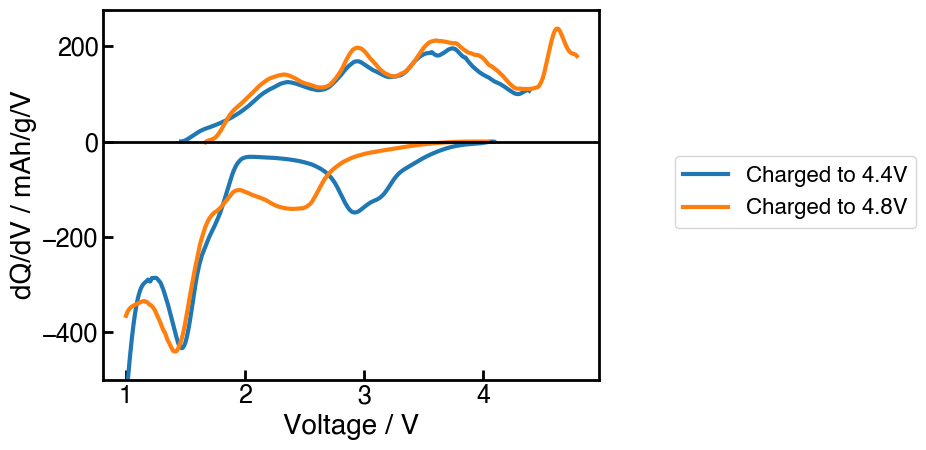

In [166]:
fig, ax = multi_cell_dqdv_plot([dqdv_055A, dqdv_055C],
                            # halfcycles=[1,2],
                             cycle=1,
                             capacity_label='Specific Capacity', 
                             labels=['Charged to 4.4V', 'Charged to 4.8V'])
plt.ylim(bottom=-500)
cm = plt.get_cmap('tab10')
# for x in [2.66, 2.90]:
#     plt.axvline(x, color=cm(0), linestyle='--', linewidth=1)
# for x in [1.92, 4.11]:
#     plt.axvline(x, color=cm(1), linestyle='--', linewidth=1)

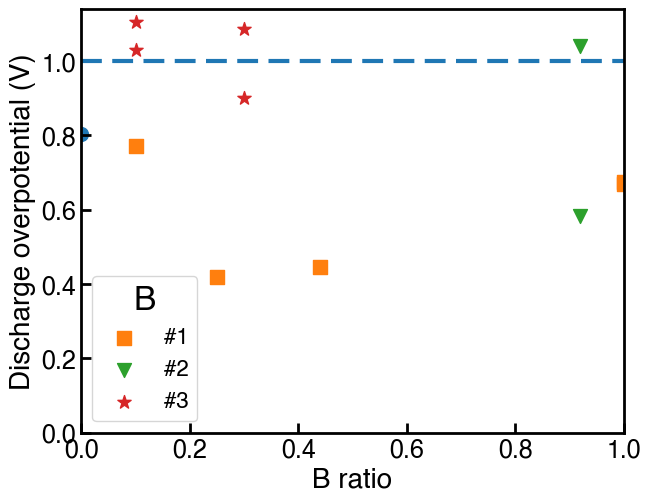

In [167]:
plt.subplots(figsize=(7,5.5))
plt.scatter([0], [0.804], label='_')
plt.scatter([0.1, 0.25, 0.44, 1, 1], [0.771, 0.418, 0.445, 0.673, 0.670], marker='s', label='#1')
plt.scatter([0.92, 0.92], [1.039, 0.584], marker='v', label='#2')
plt.scatter([0.1, 0.1, 0.3, 0.3], [1.030, 1.105, 1.087, 0.901], marker='*', label='#3')

plt.legend(title='B')
plt.xlim(0,1)
plt.ylim(bottom=0)
plt.xlabel('B ratio')
plt.ylabel('Discharge overpotential (V)')
plt.axhline(1, linestyle='--')

In [54]:
cells_df[cells_df['LCV'] > 1.1]

KeyError: 'LCV'